In [1]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:


# Use relative path in WSL issues
main_outdir = "../imgs"

# READ PATHS (Dumps)
user_dir_fmt = "user_{}"
dump_filename = "stream_info_dump.pth"
parent_outputdir = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/forgetting_eval/logs/2022-09-23_21-12-33_UIDec506d45-3018-468f-b63a-89744c5d10f9/user_logs/"

# Plot configs
plot_config = {
    "color": 'royalblue',
    "dpi": 600,
    "figsize": (6,6),
    "xlabel": "re-exposure iterations",
    "ylabel": "",
    "title": None
}

# KEYS
saved_dumpkeys = [
    'train_action_past/FORG_EXPOSE_loss',
    'train_action_past/FORG_EXPOSE_top1acc',

    'train_verb_past/FORG_EXPOSE_loss',
    'train_verb_past/FORG_EXPOSE_top1acc',
    'train_verb_past/FORG_EXPOSE_top5acc',
    'train_verb_past/FORG_EXPOSE_top20acc',

    'train_noun_past/FORG_EXPOSE_loss',
    'train_noun_past/FORG_EXPOSE_top1acc',
    'train_noun_past/FORG_EXPOSE_top5acc',
    'train_noun_past/FORG_EXPOSE_top20acc'
]
CHOSEN_KEY = 'train_action_past/FORG_EXPOSE_loss'

# Adapt cfg
ylabel_map = {
    'train_action_past/FORG_EXPOSE_loss': r"RF_action",
    'train_verb_past/FORG_EXPOSE_loss': r"RF_verb",
    'train_noun_past/FORG_EXPOSE_loss': r"RF_noun",
#     'train_action_past/FORG_EXPOSE_loss': r"$RF_{\text{action}}$",
}
plot_config['ylabel'] = ylabel_map[CHOSEN_KEY]


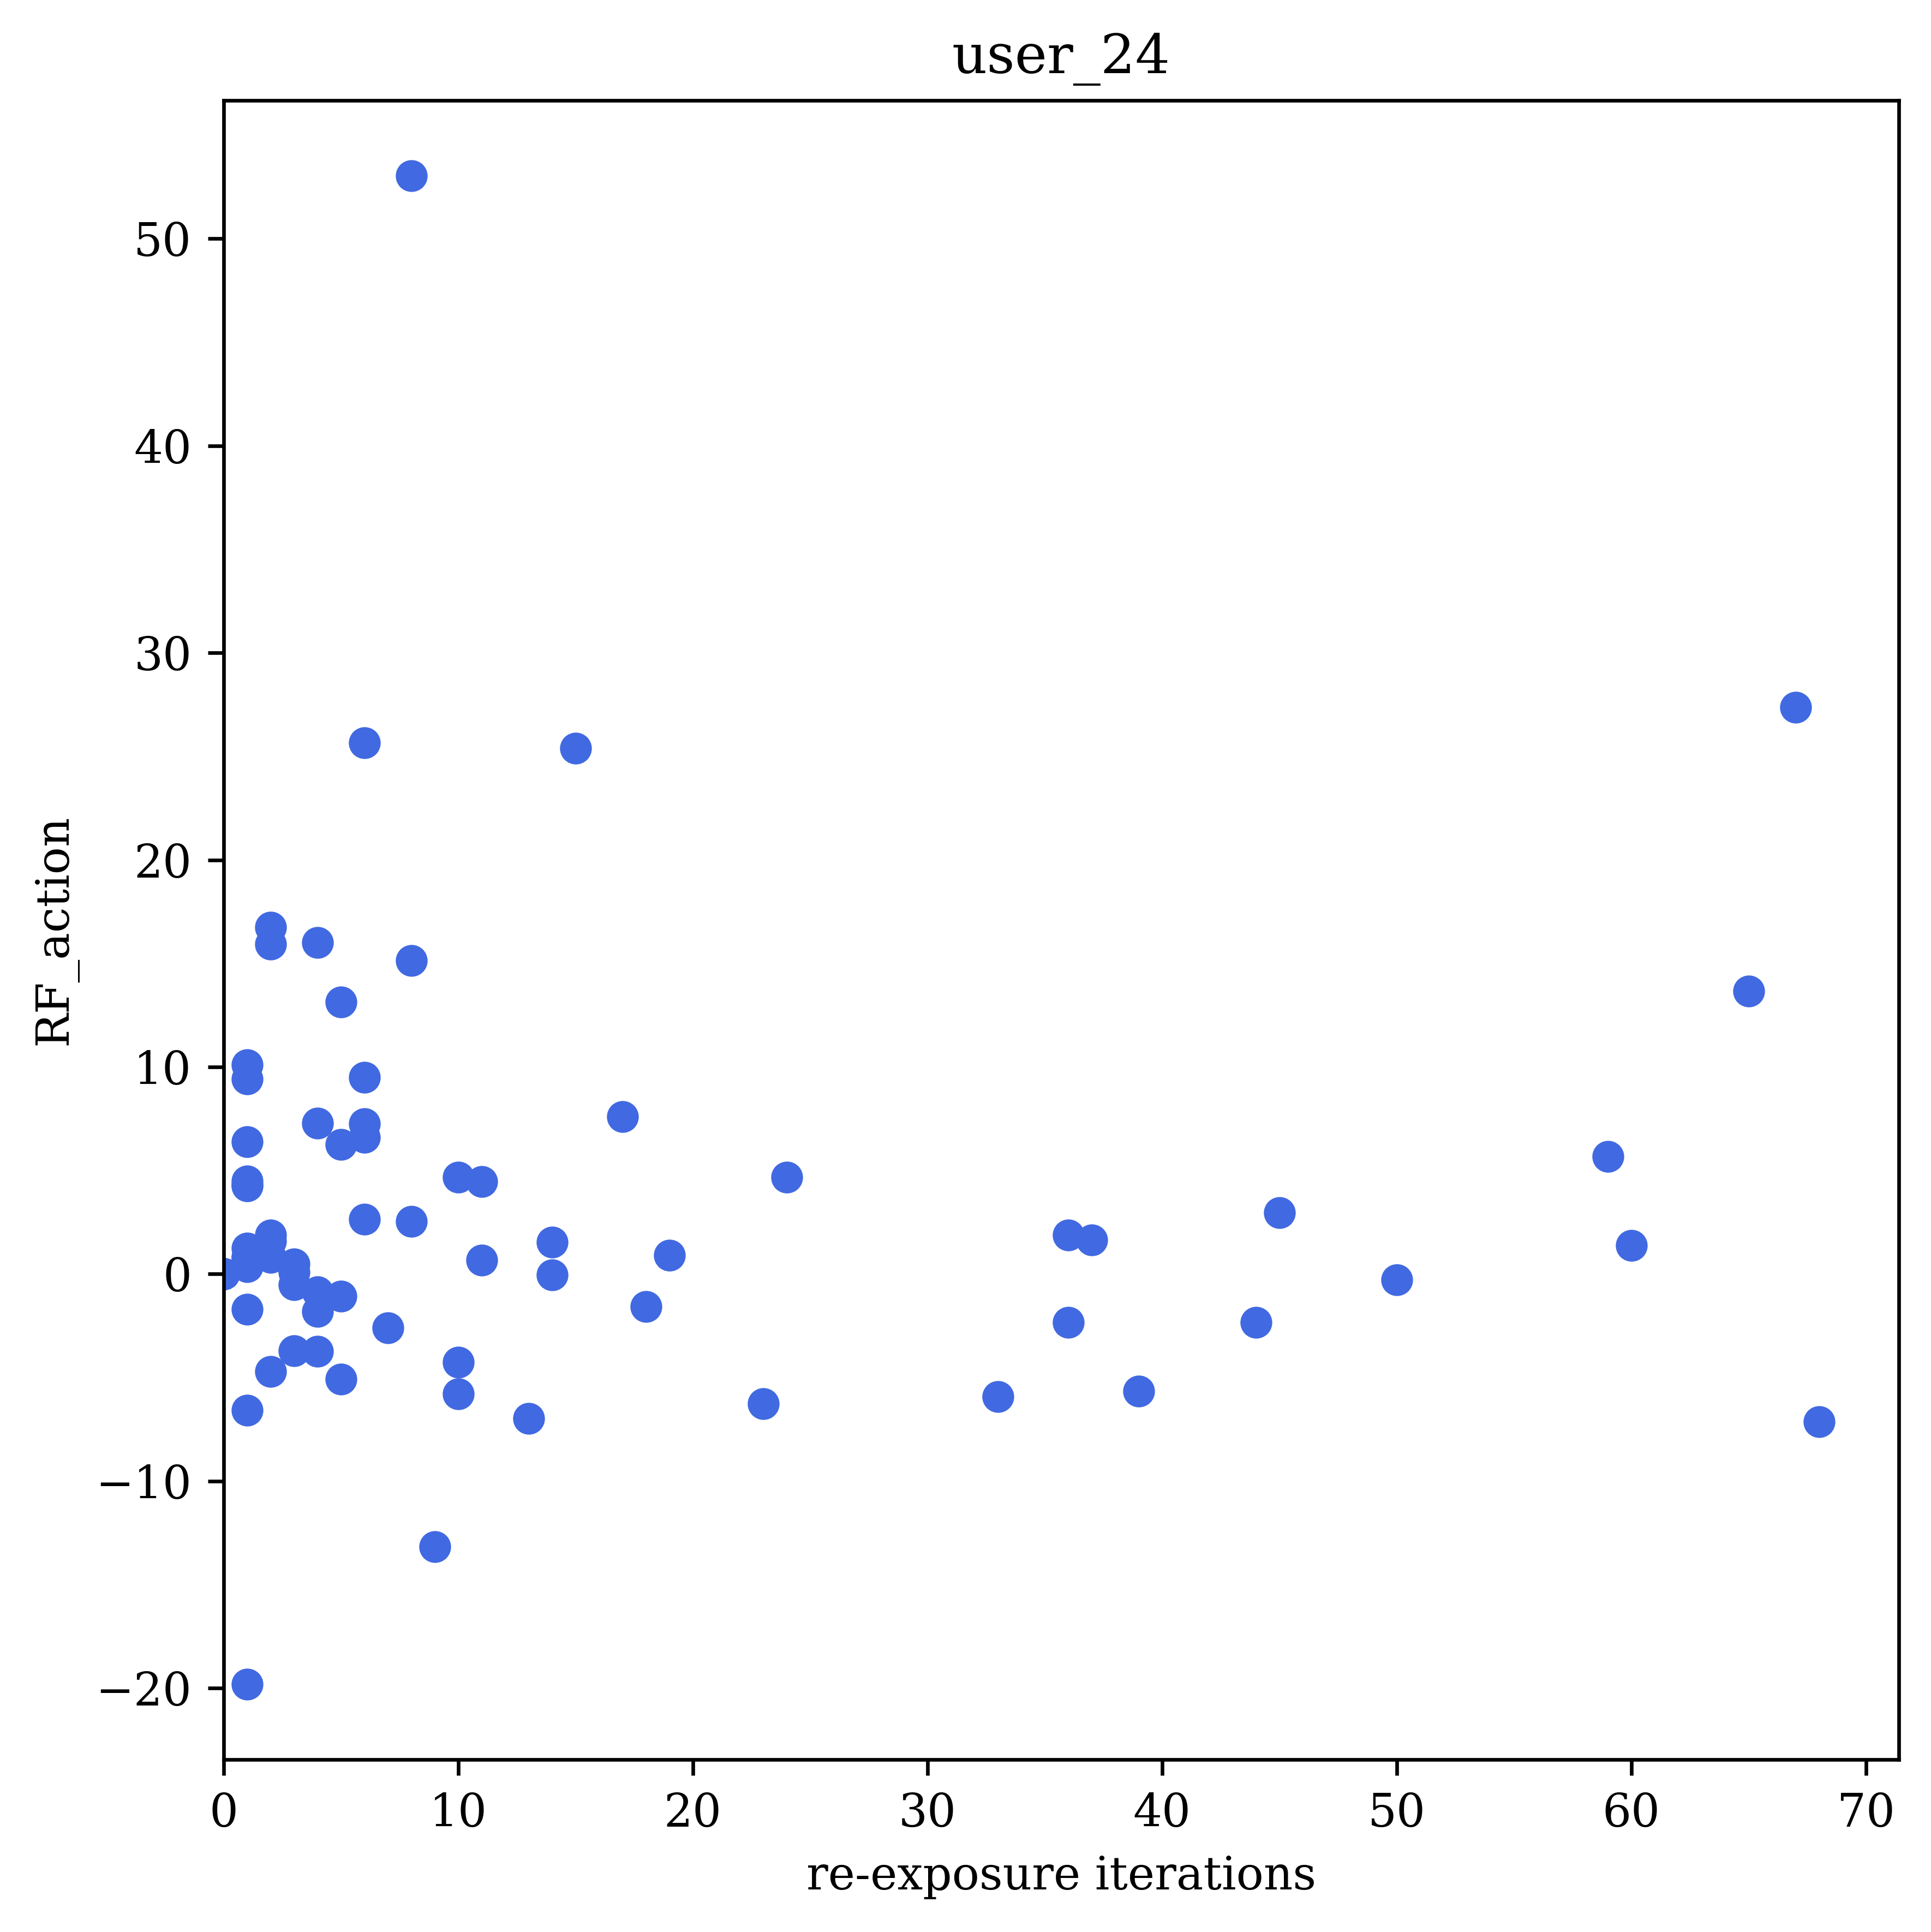

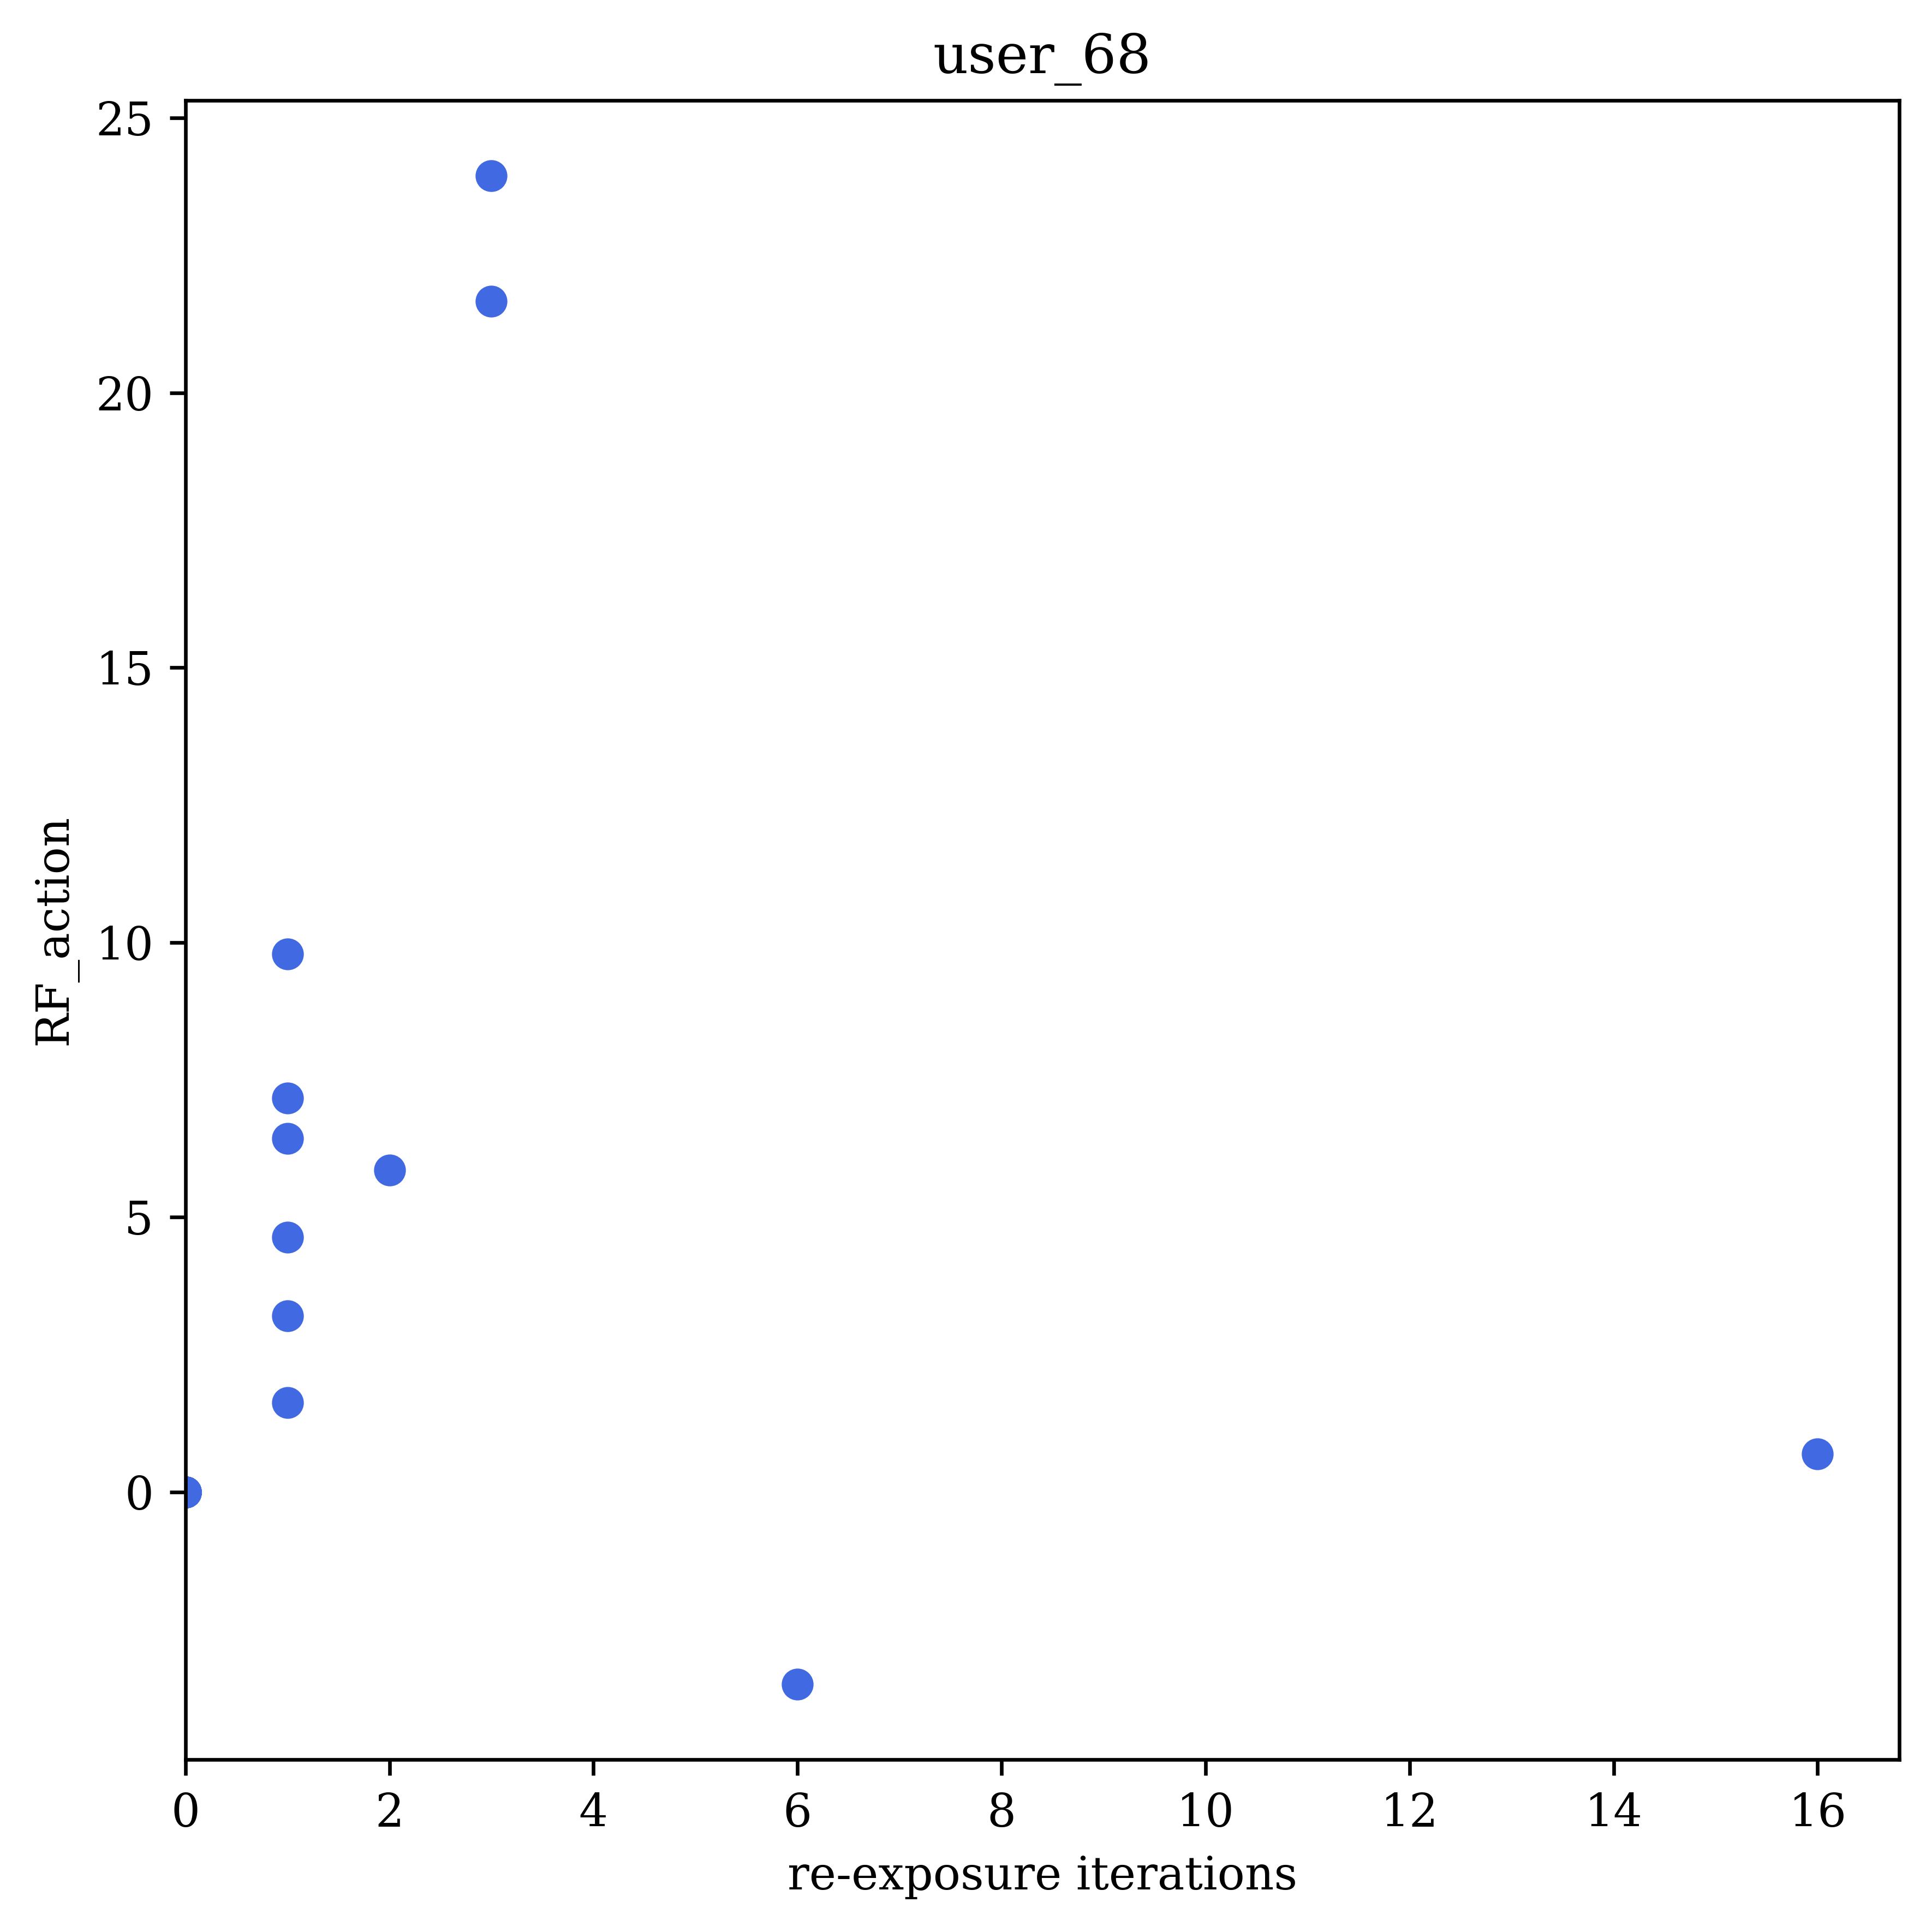

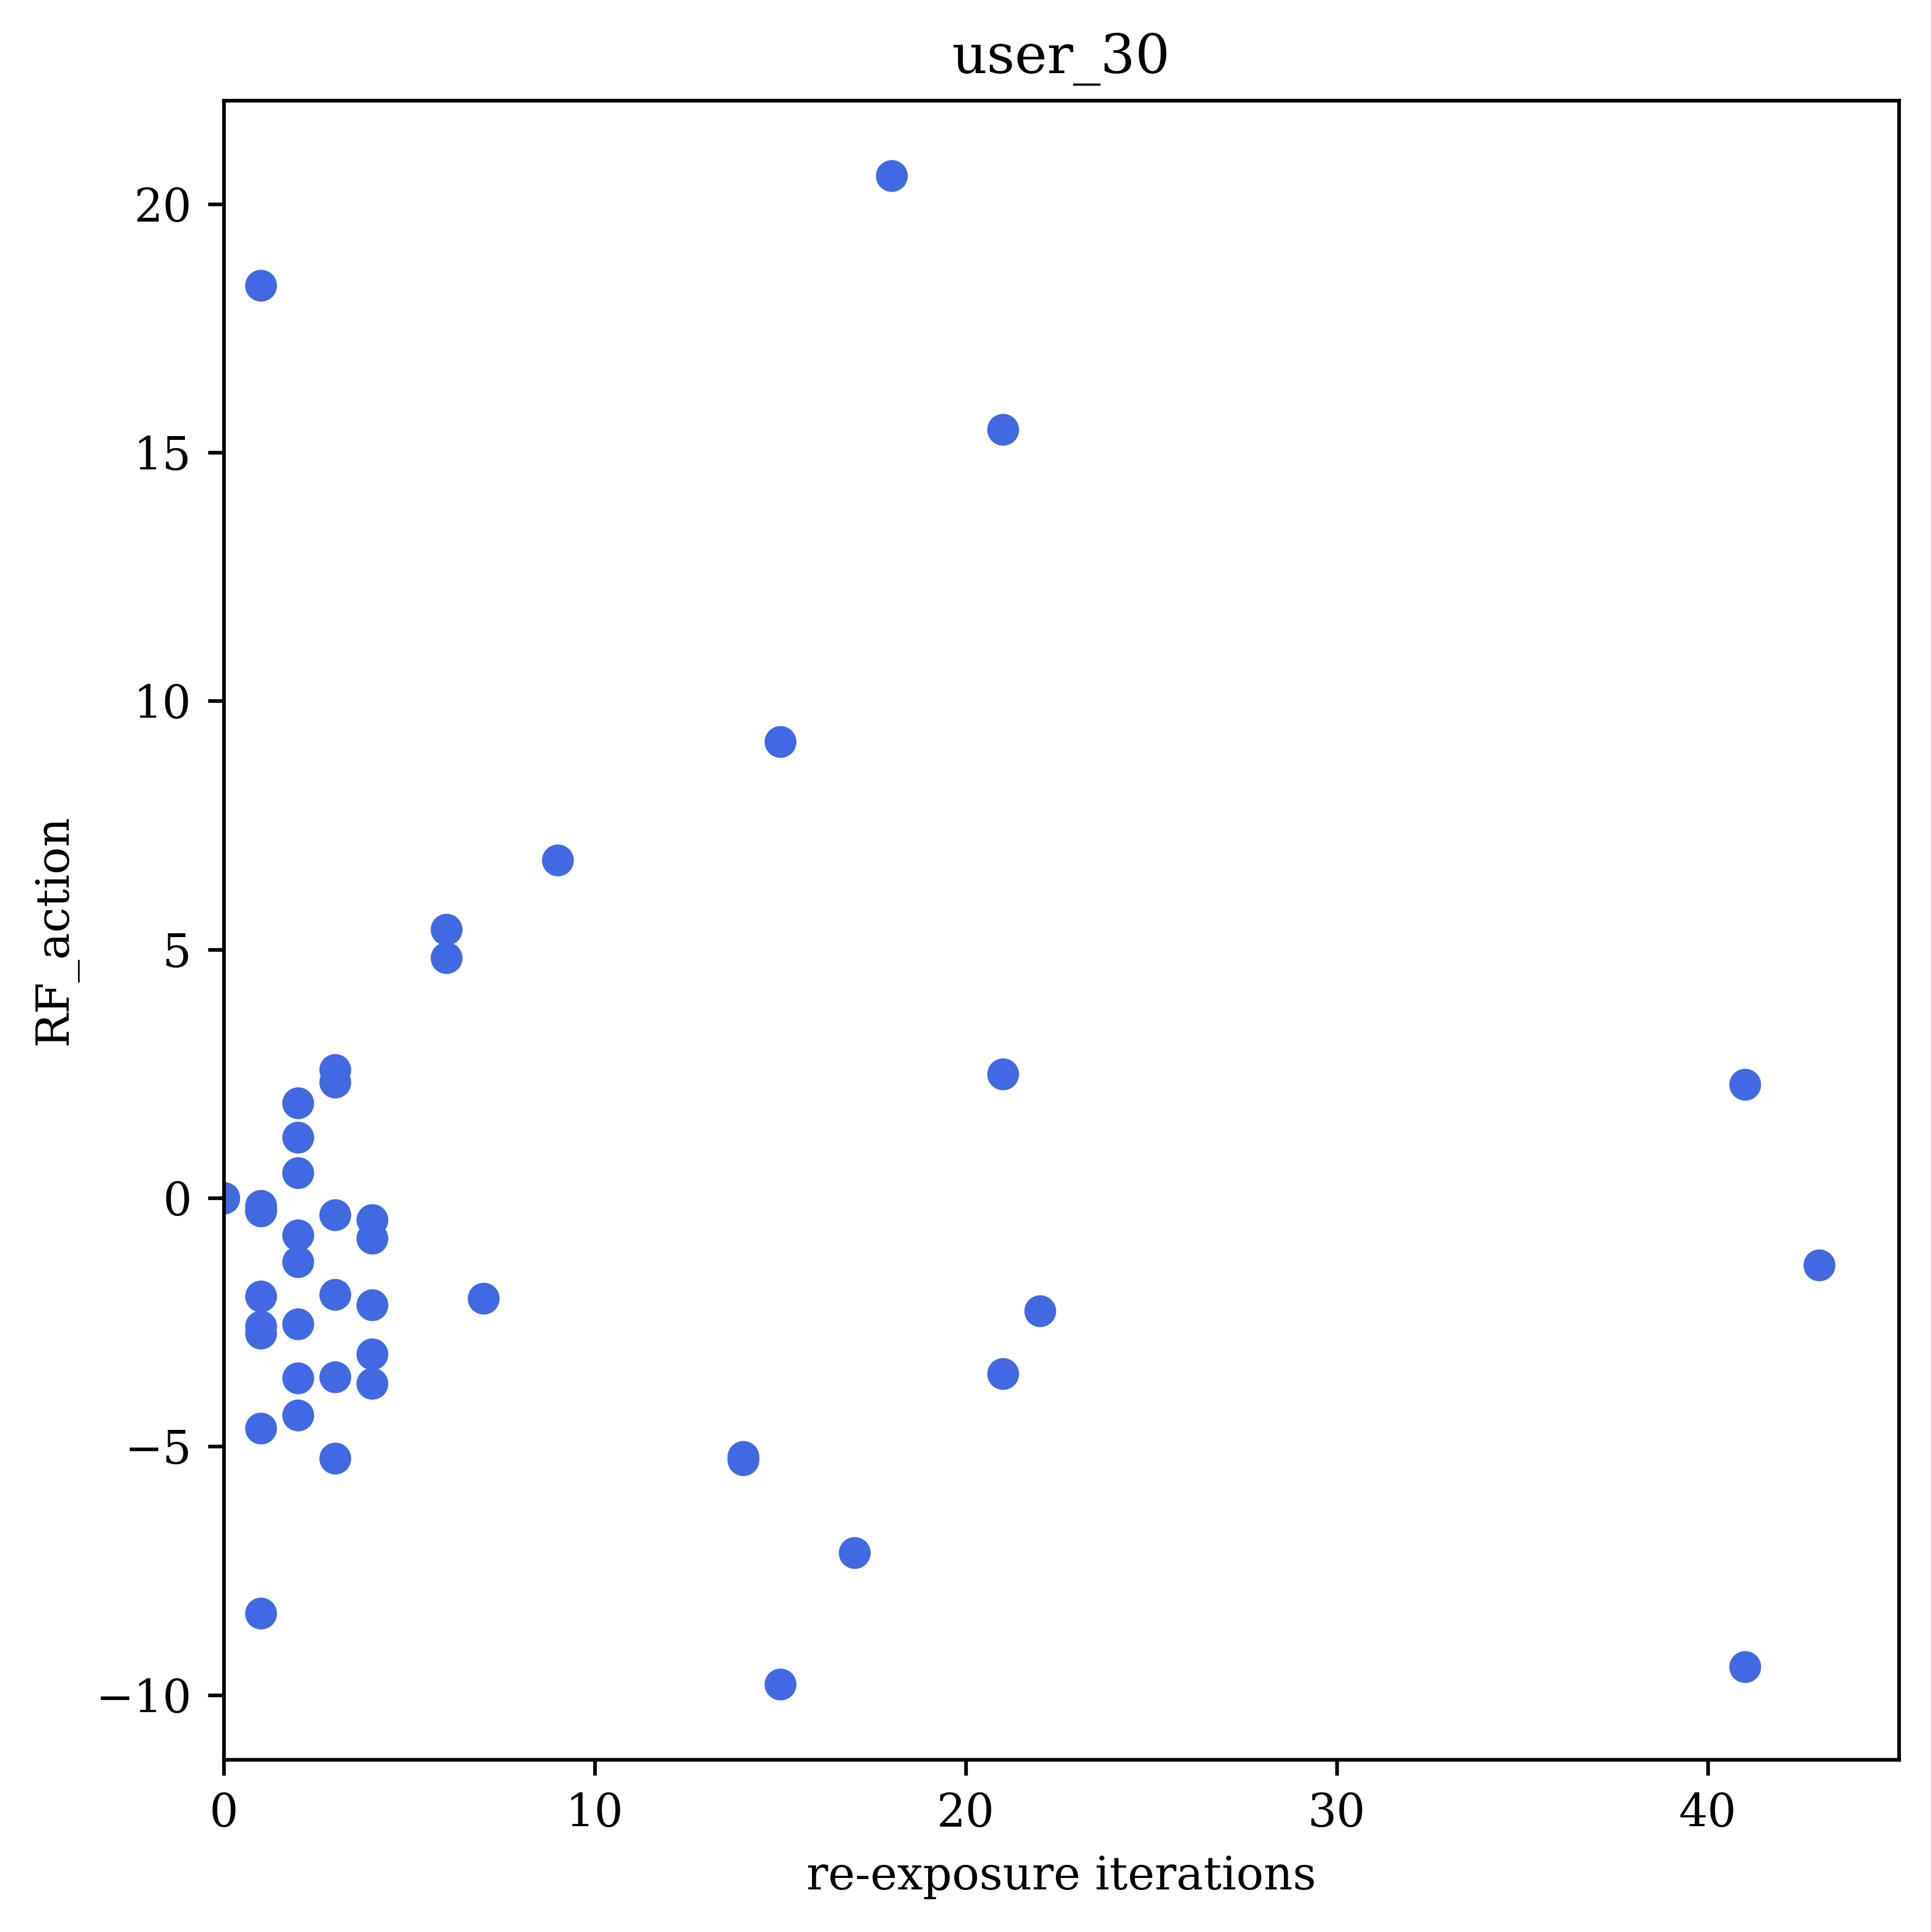

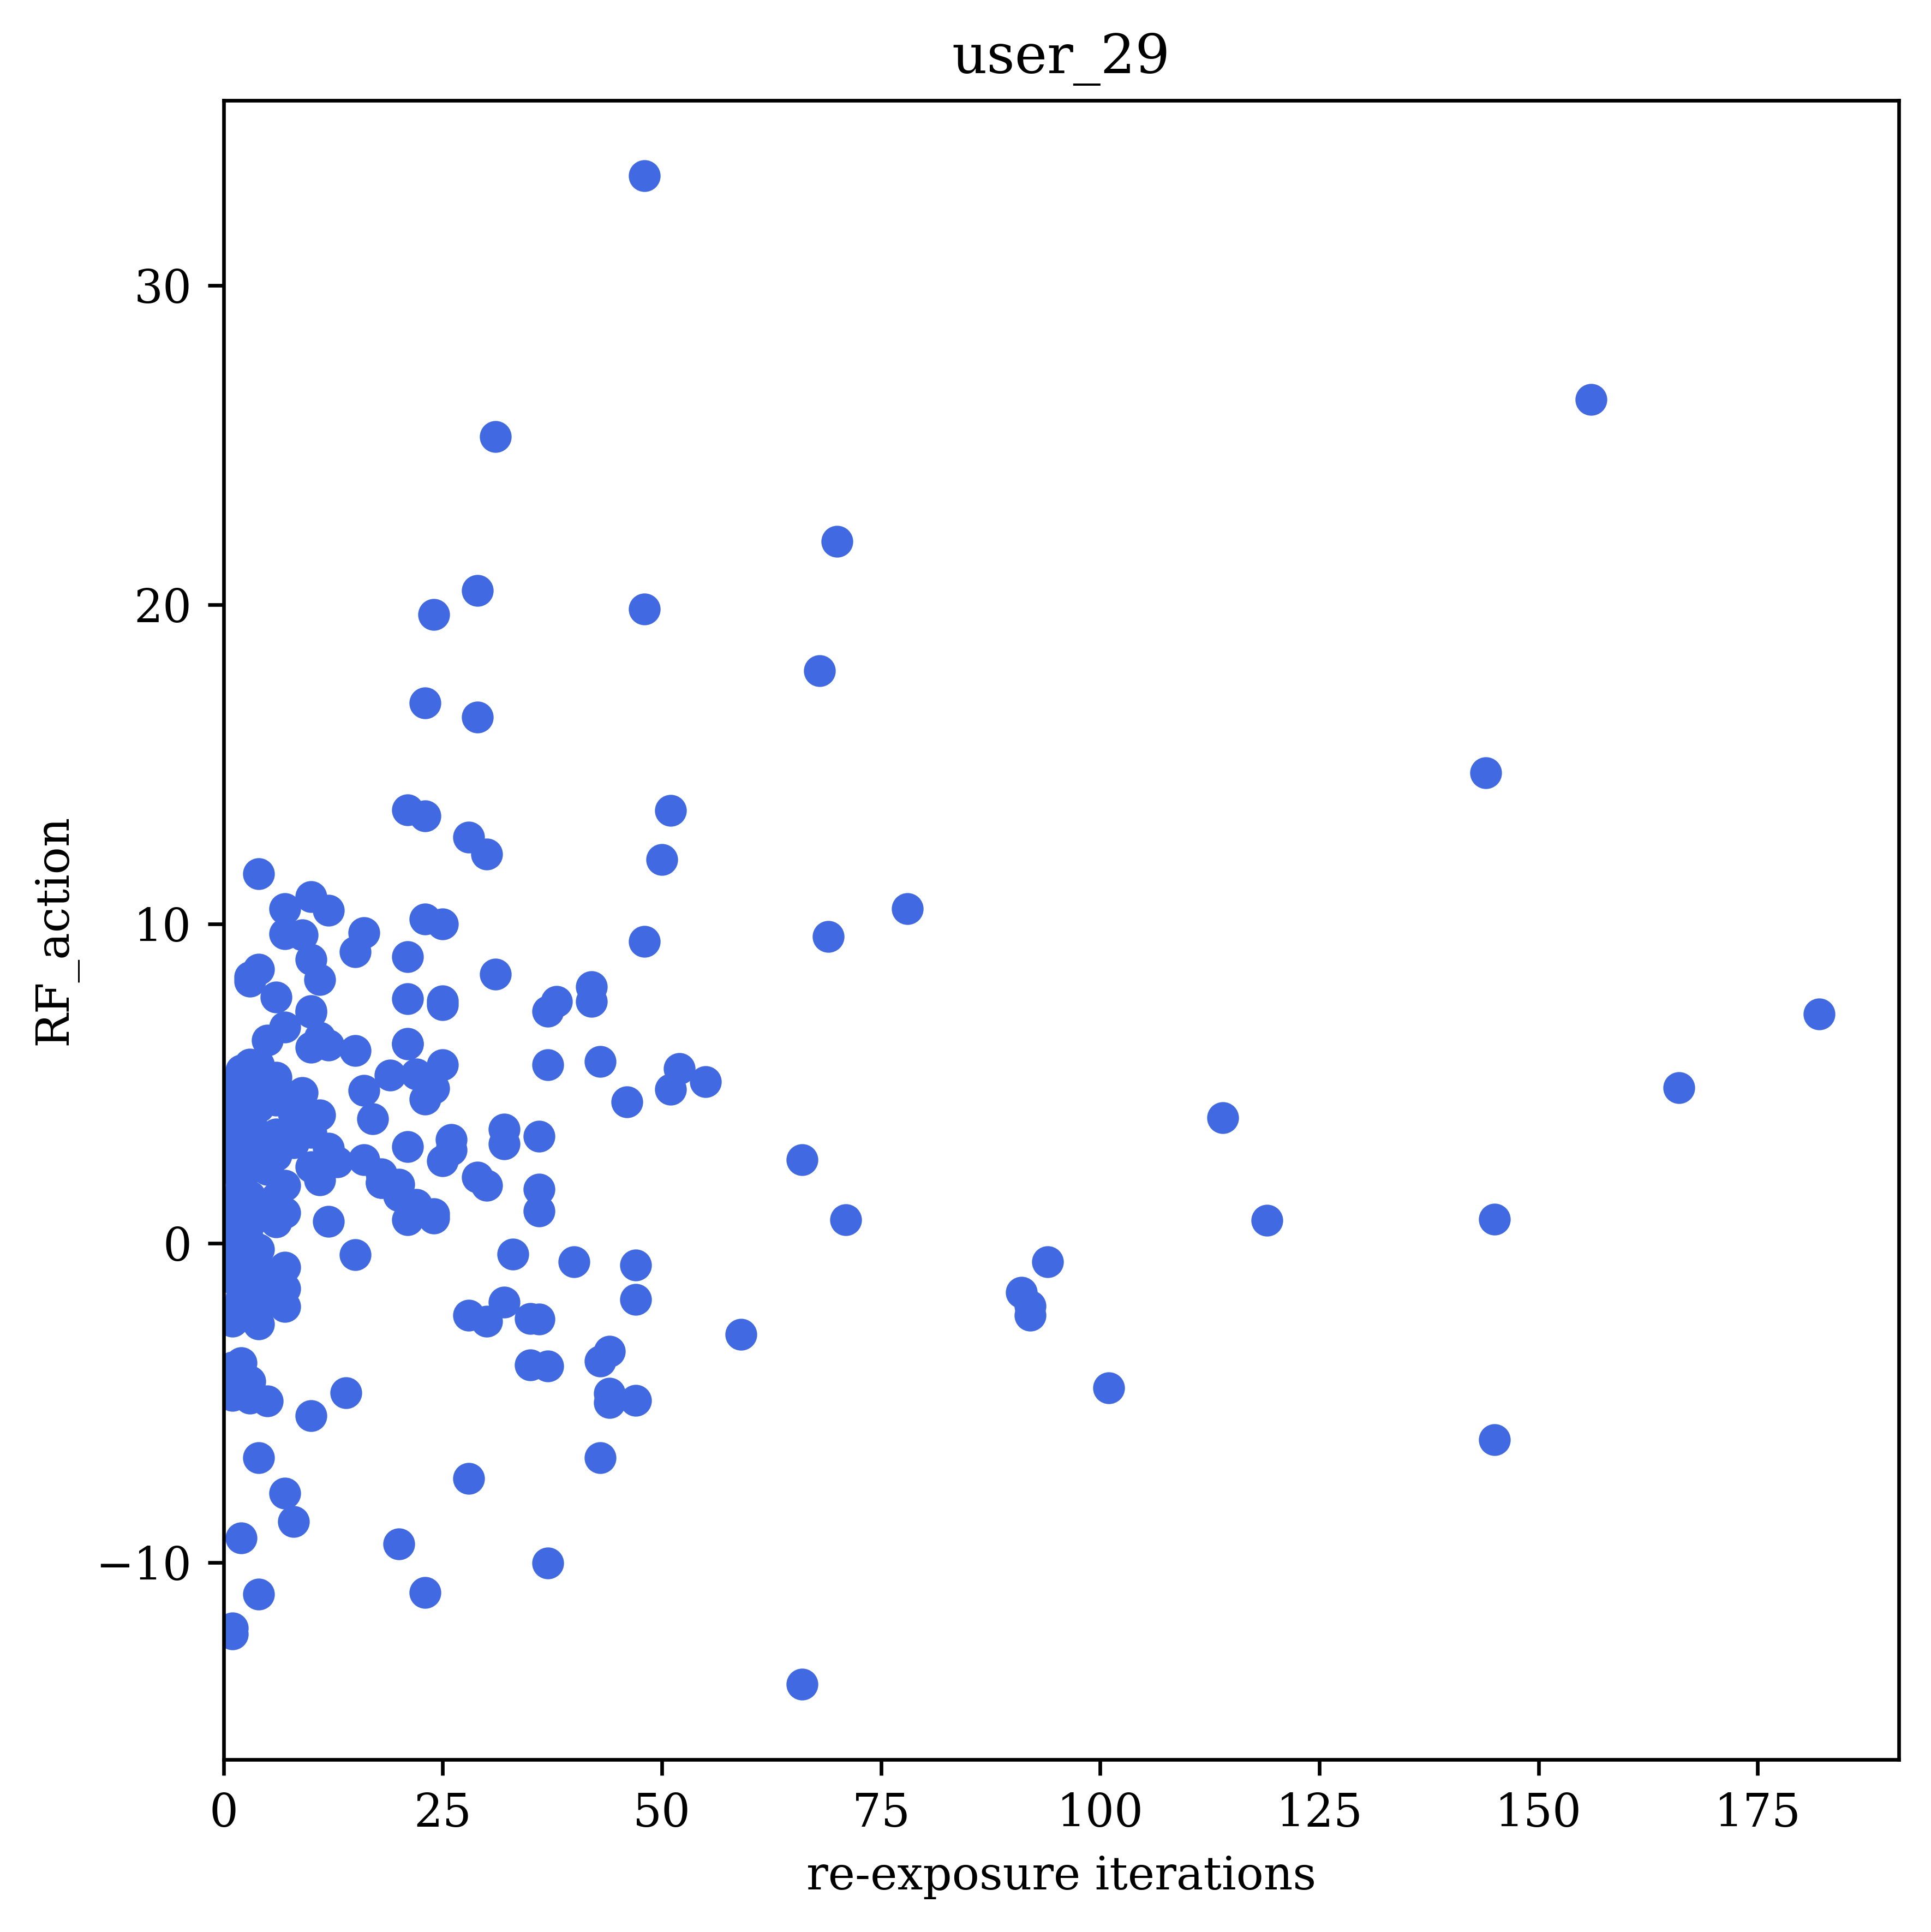

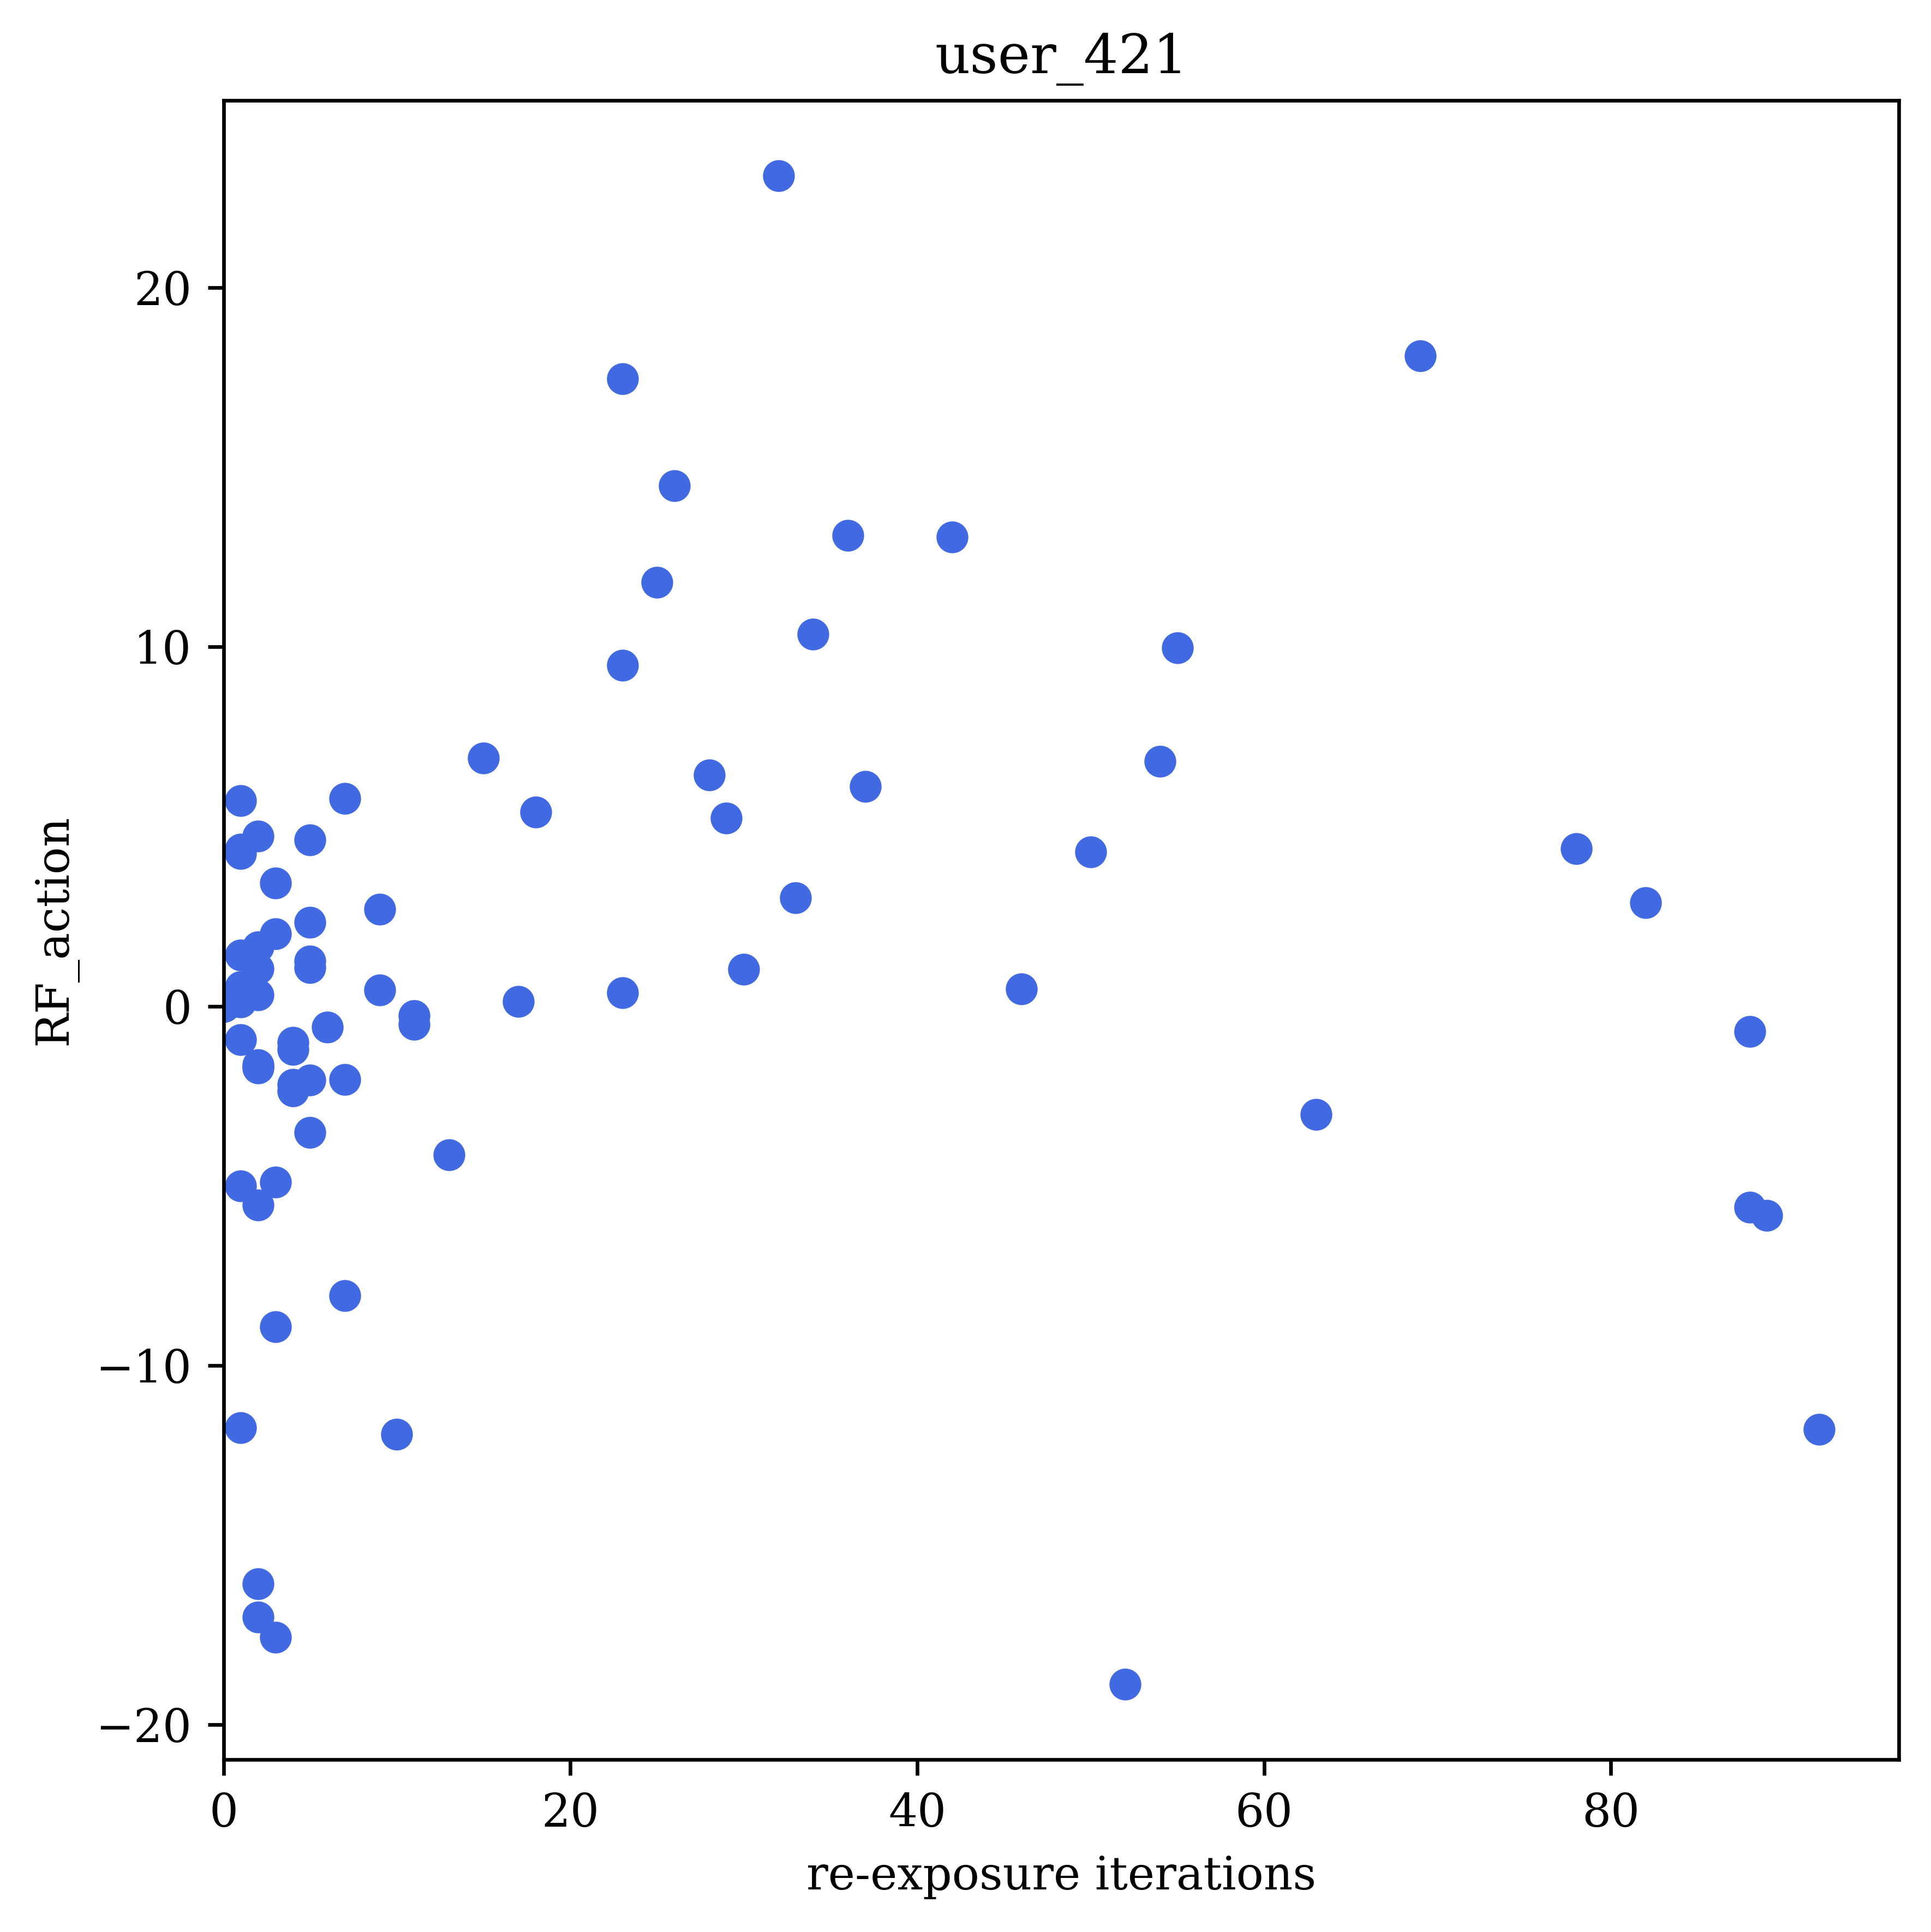

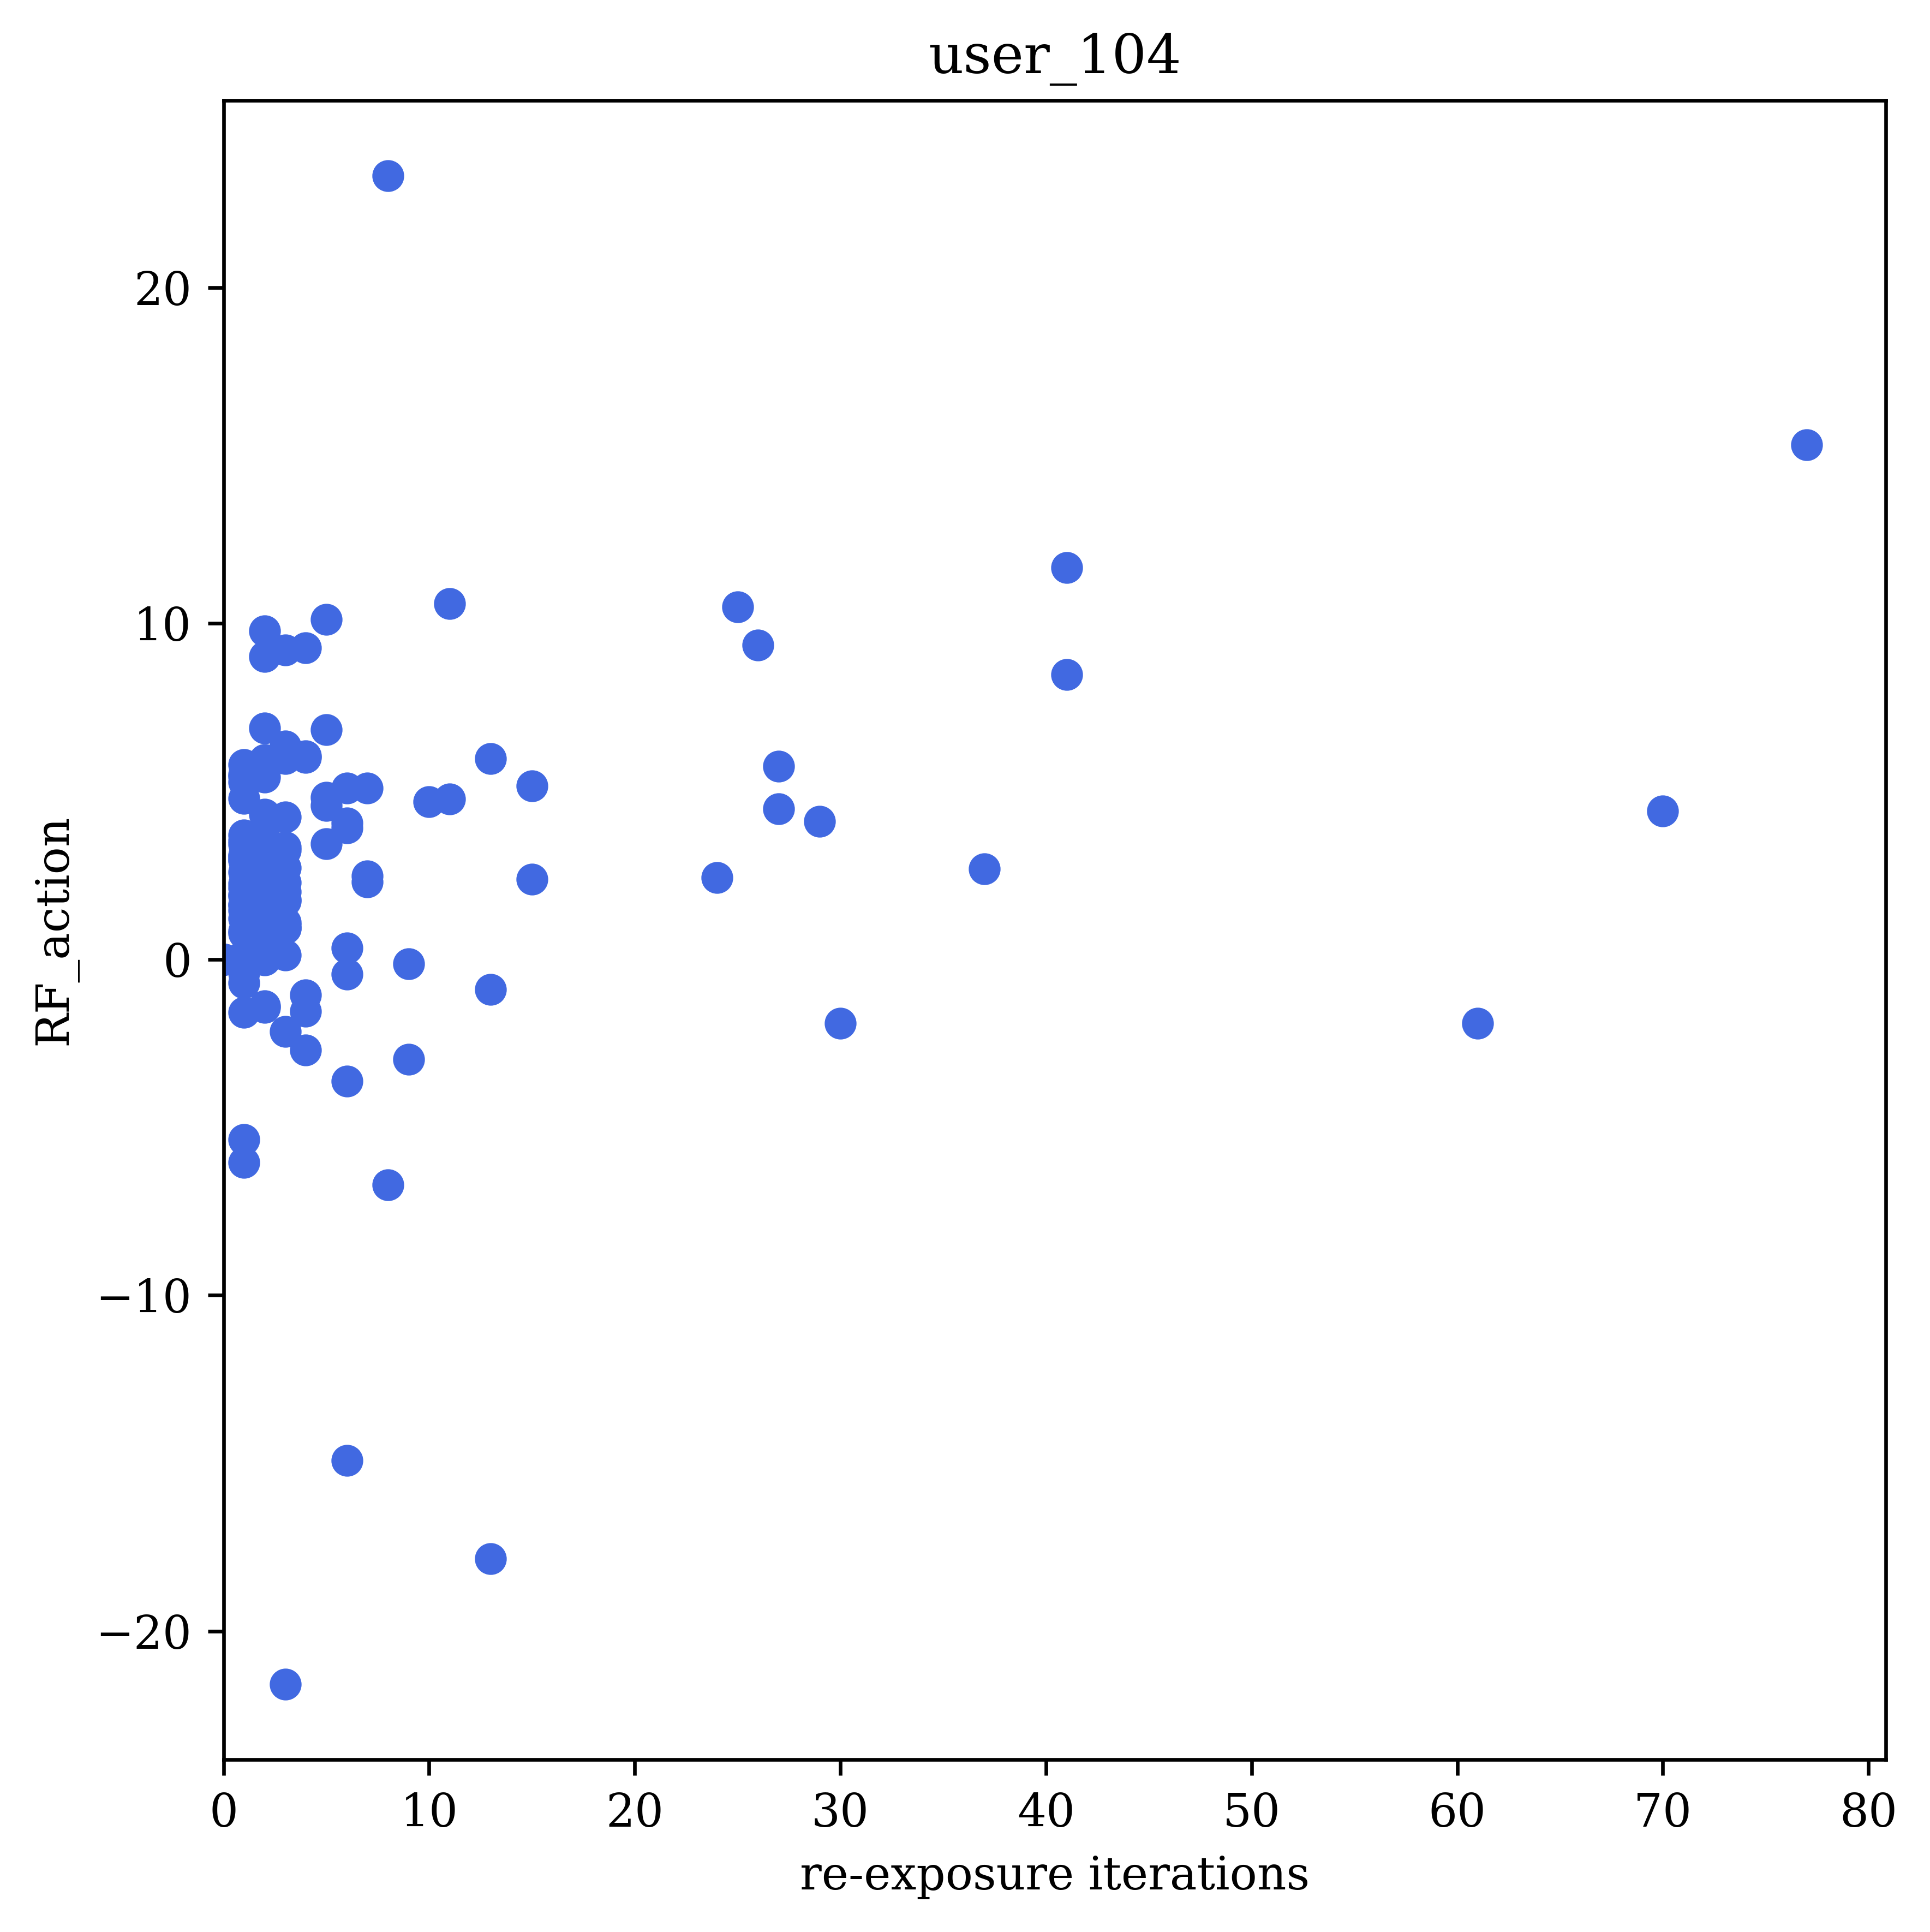

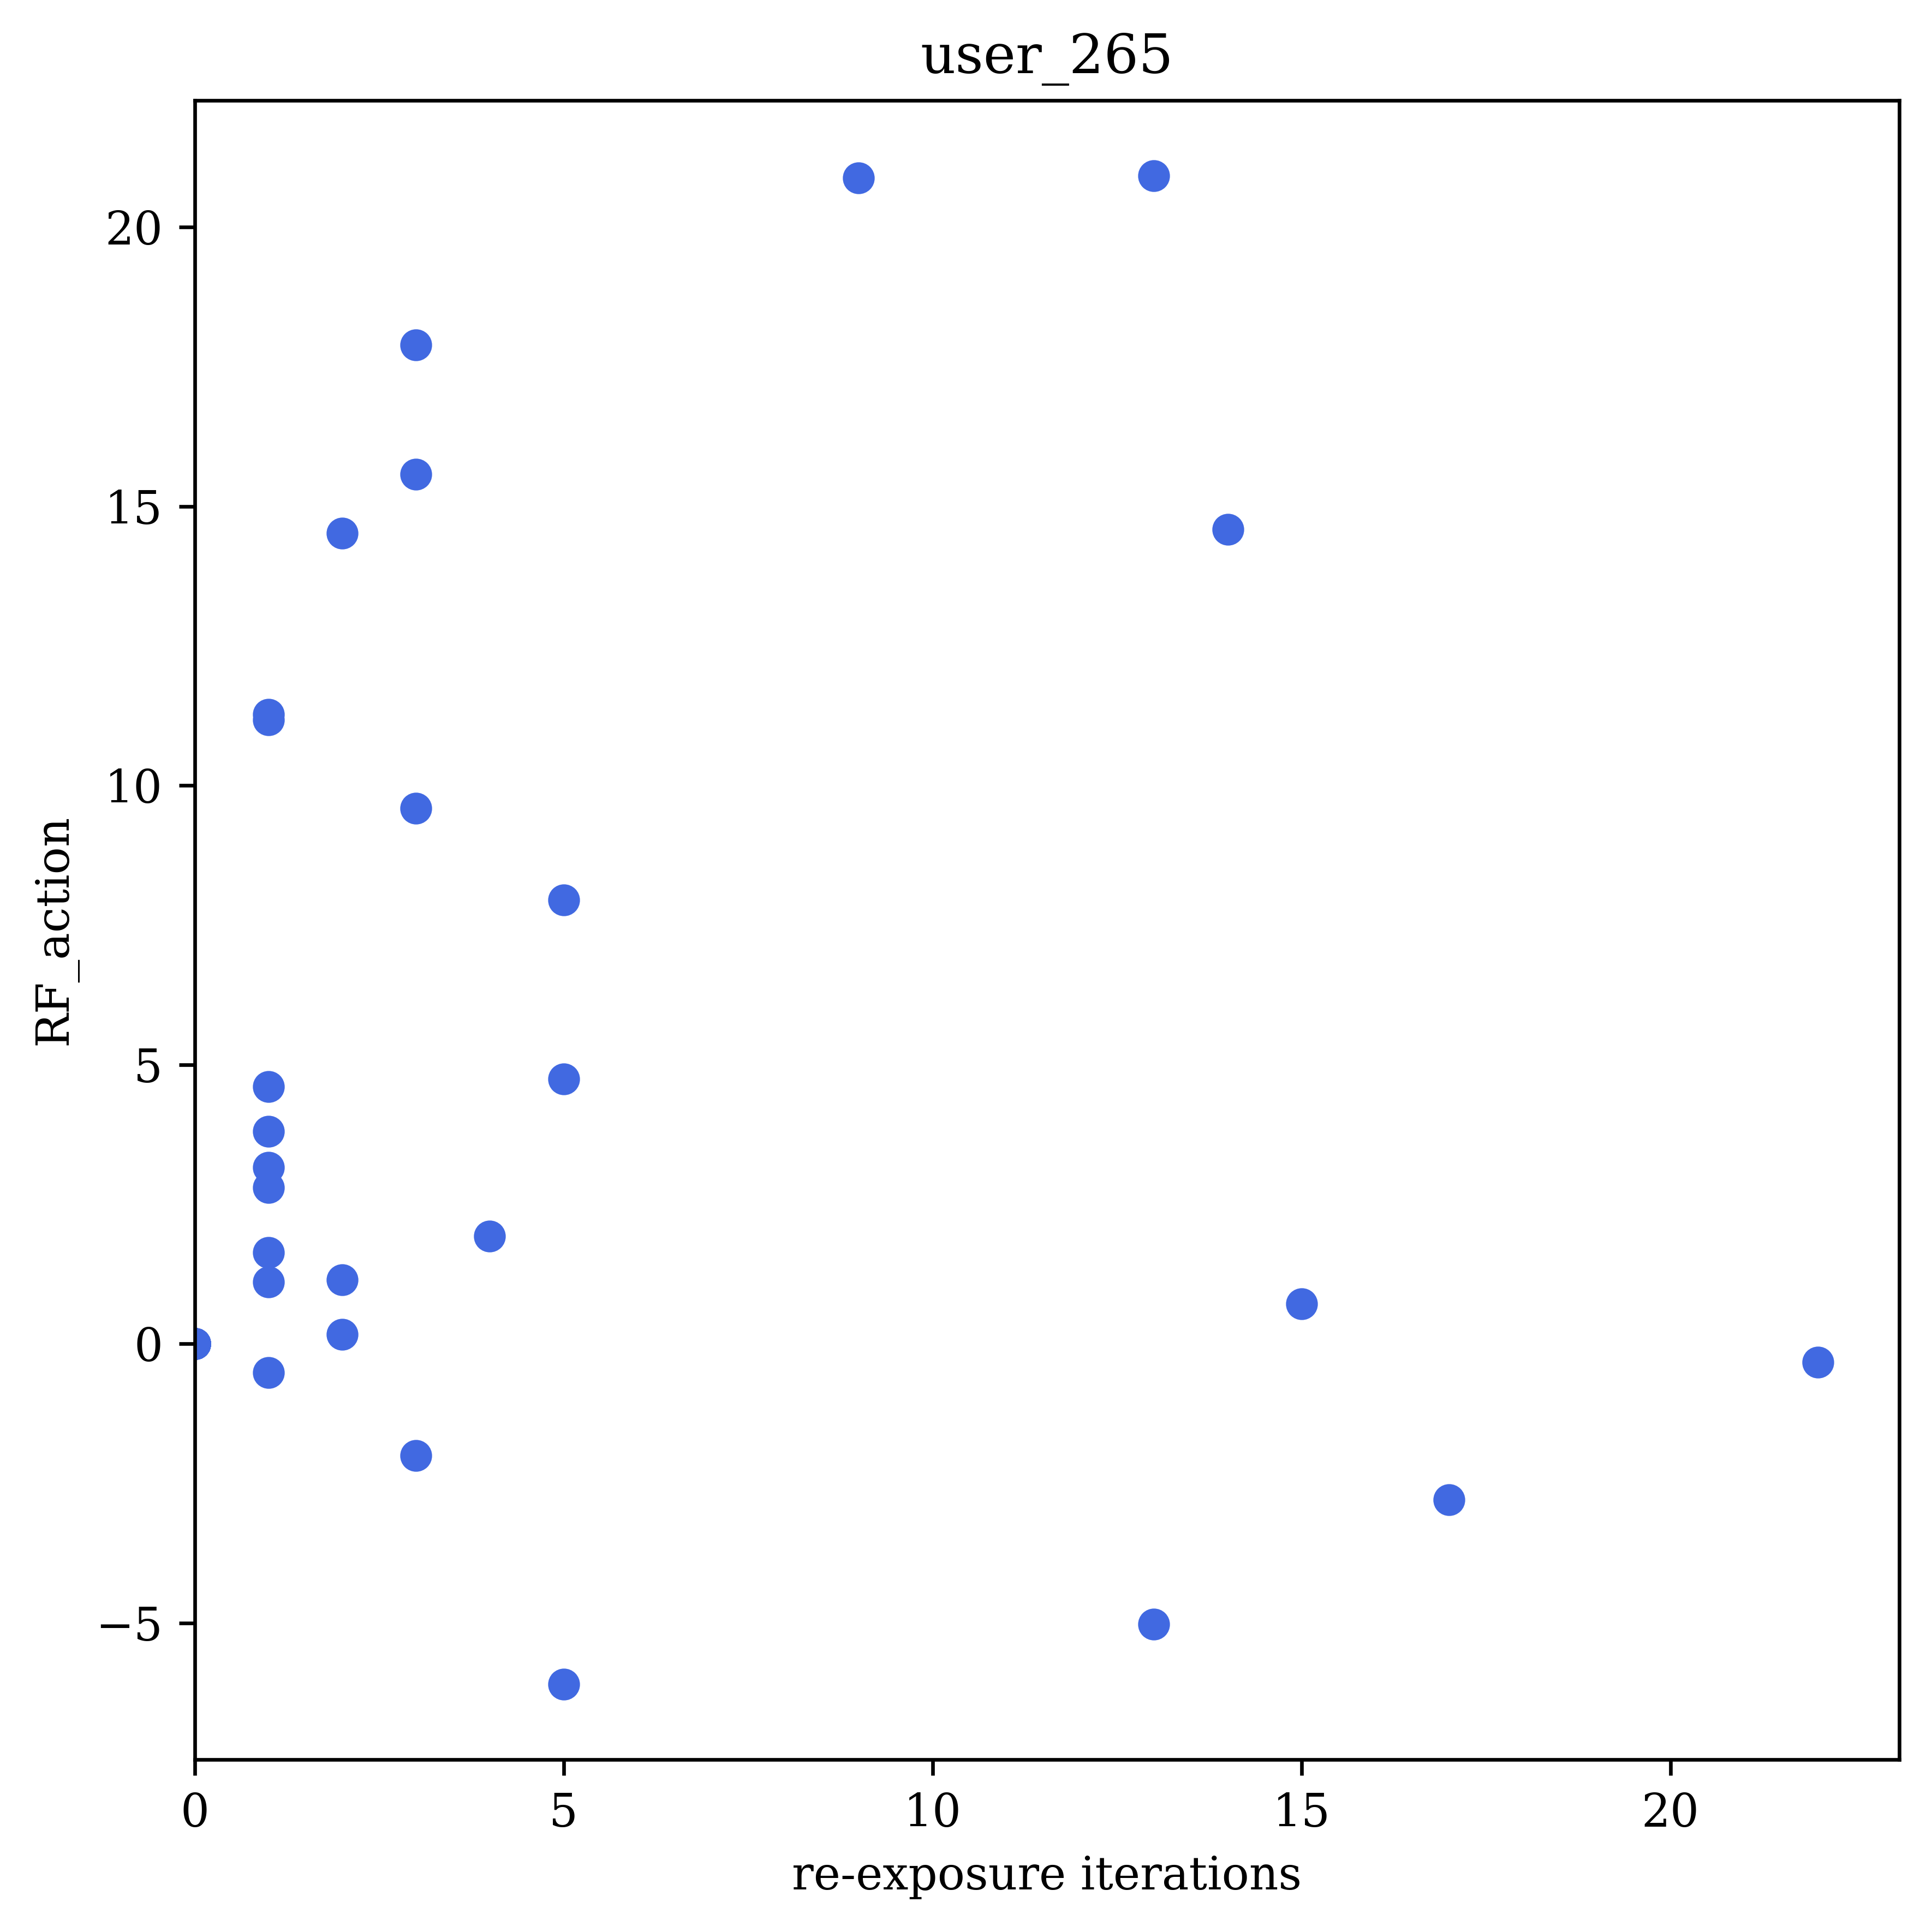

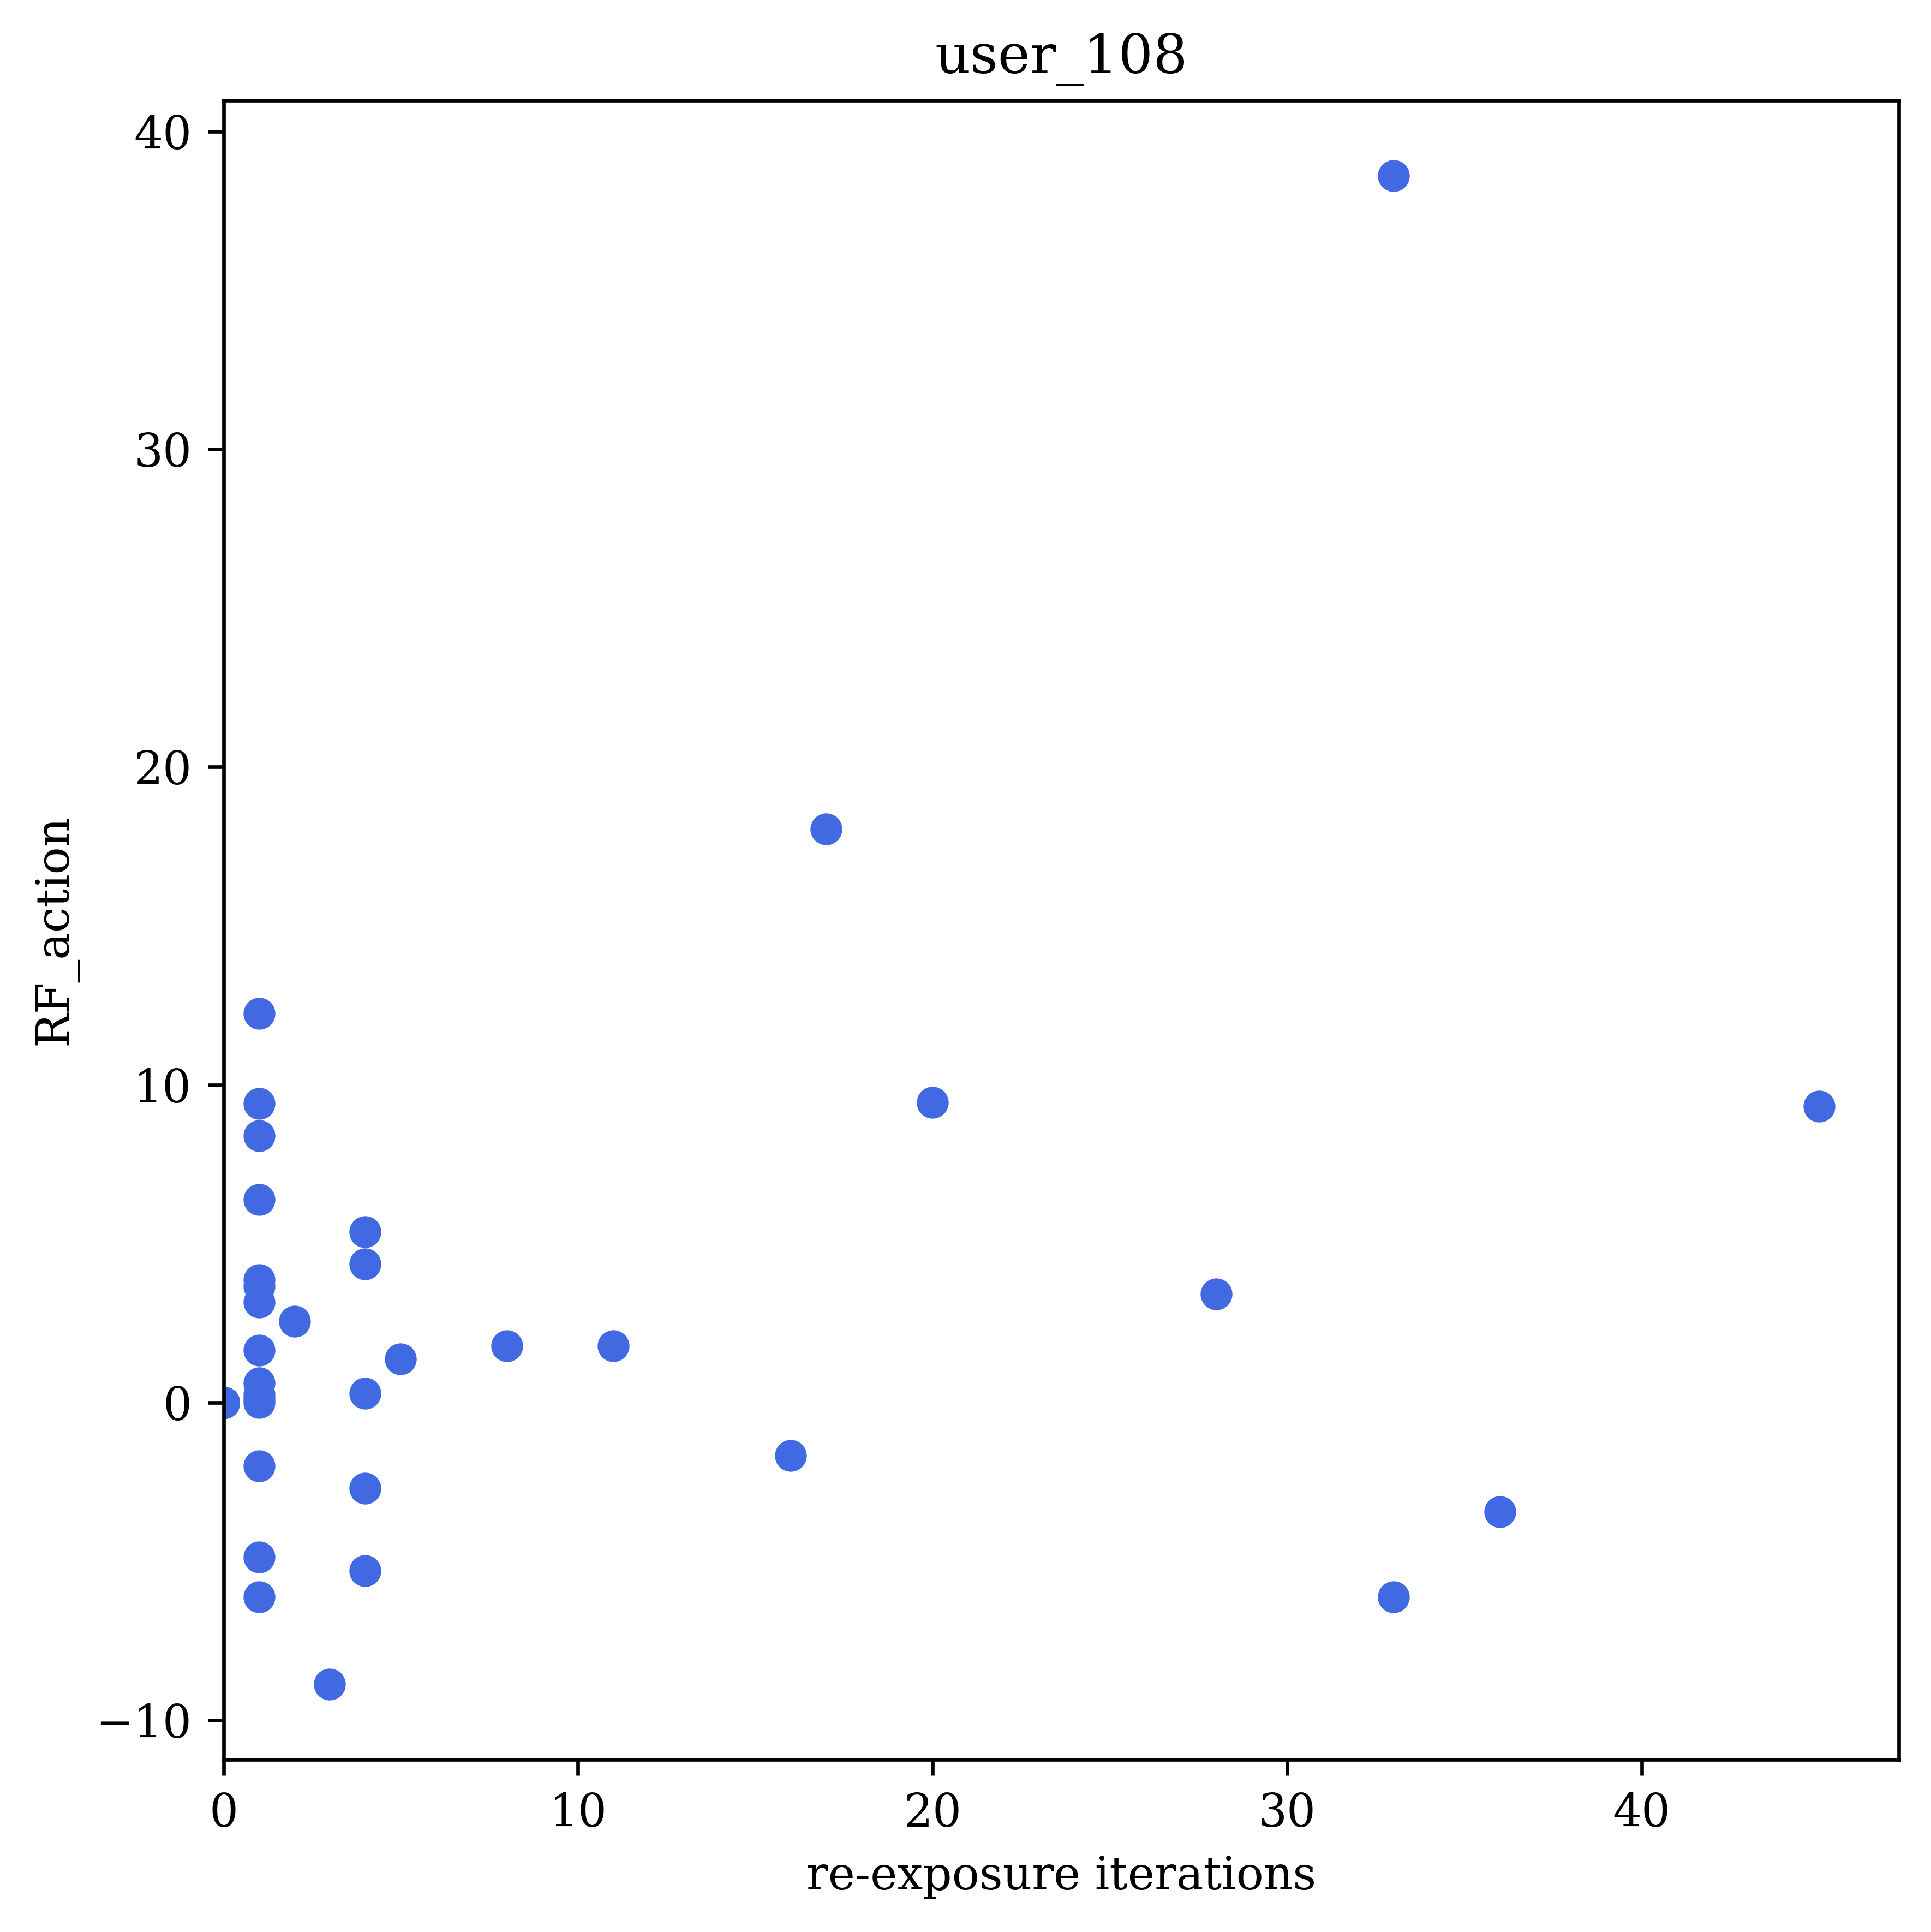

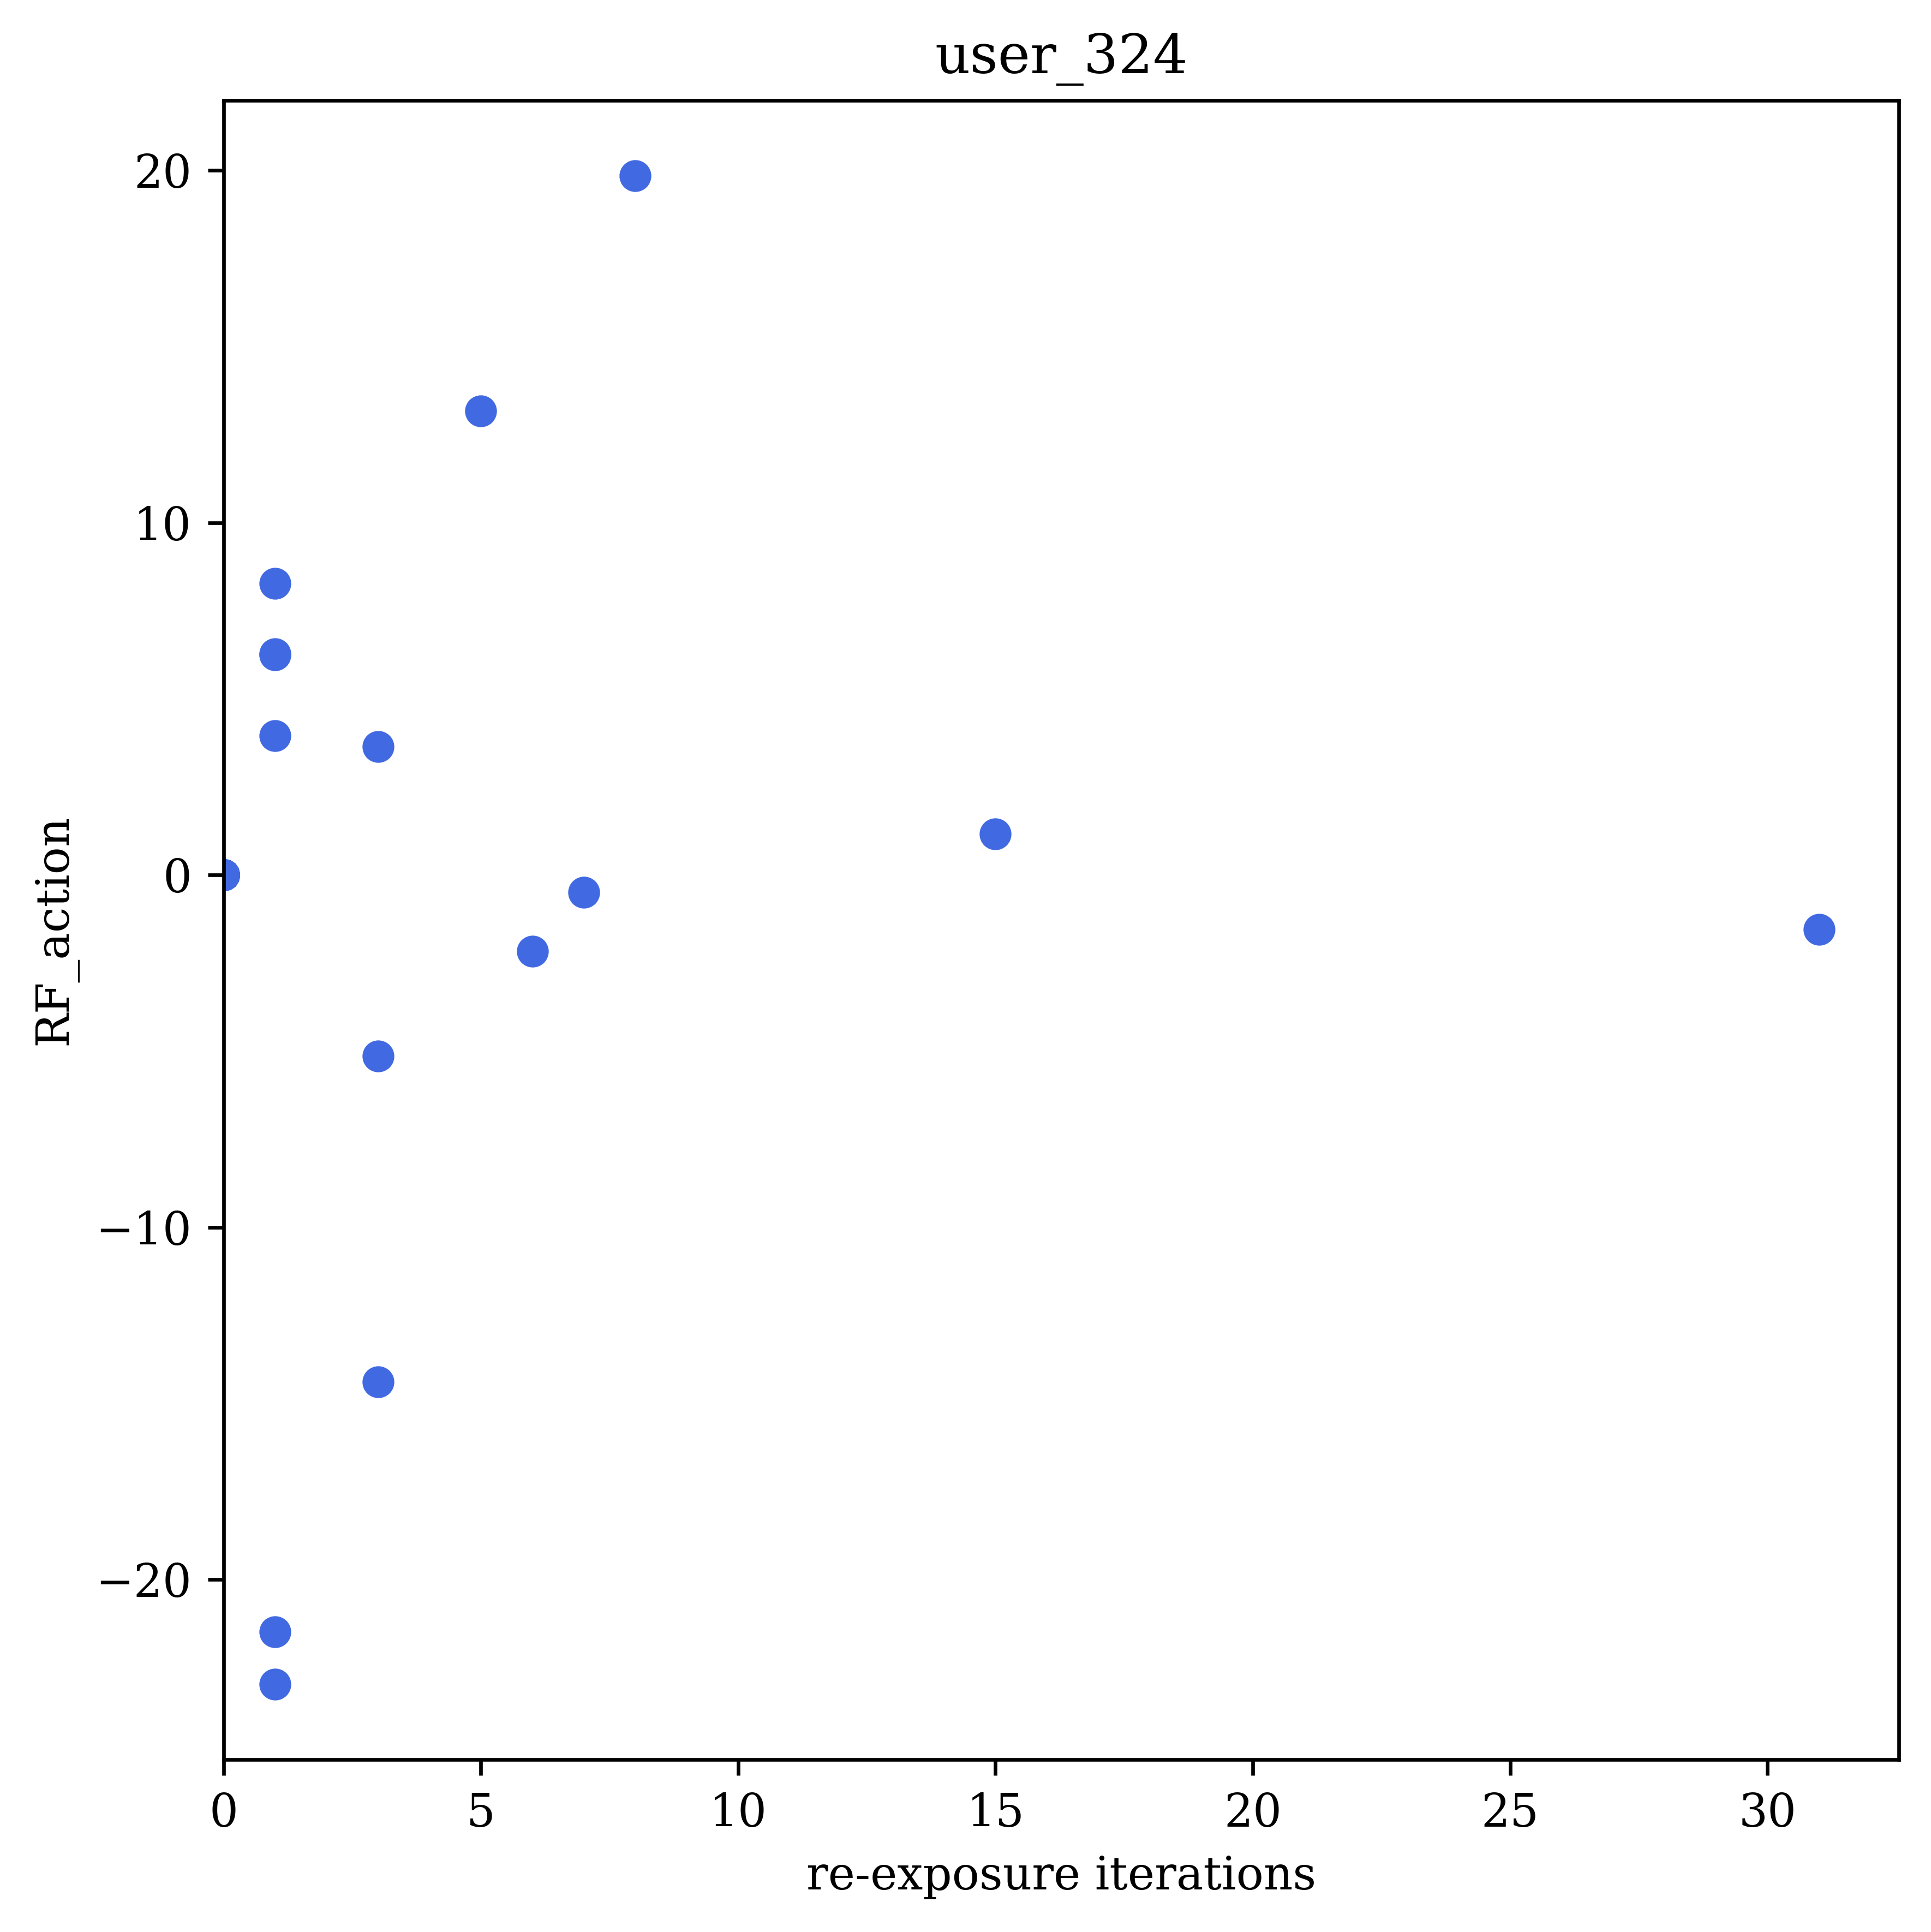

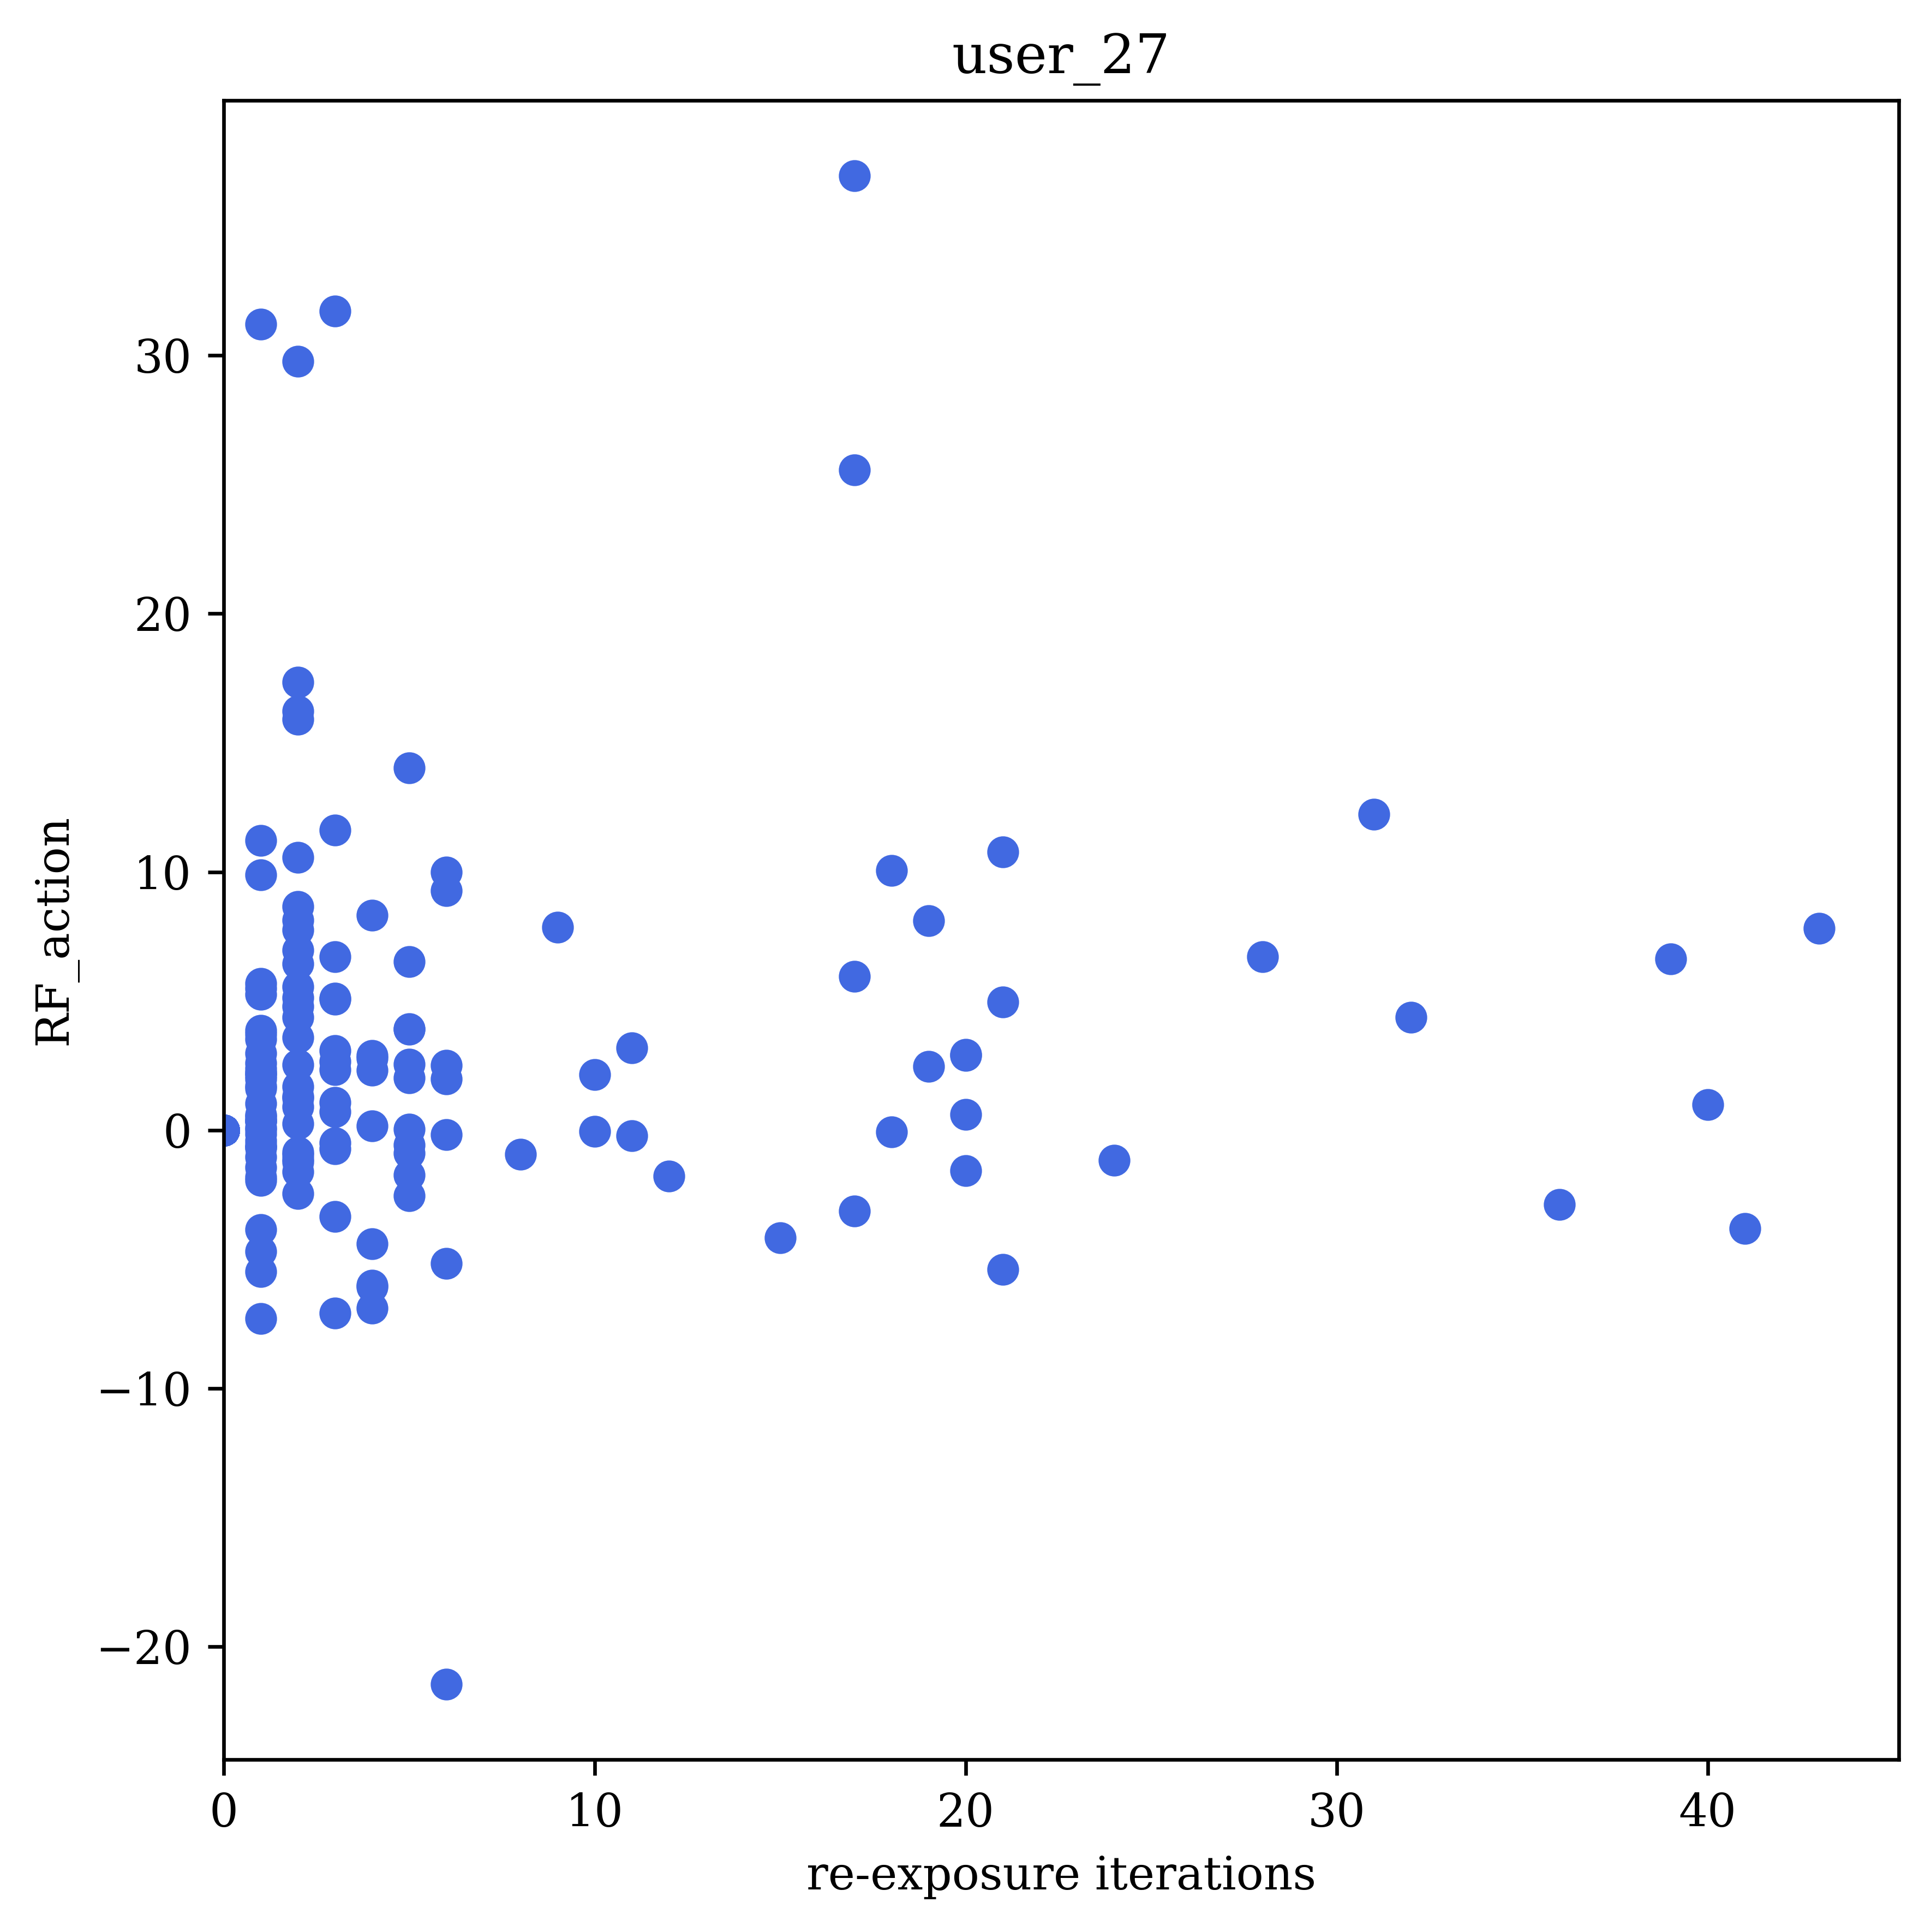

In [3]:

def plot_single_user(action_results_over_time: dict) :
    assert len(action_results_over_time["delta"]) > 0  # Don't log if state is not kept

    # Get deltas on x-axis
    deltas_x_per_action = defaultdict(list)
    for action, prev_res_over_time in action_results_over_time["prev_after_update_iter"].items():
        cur_res_over_time = action_results_over_time["current_before_update_iter"][action]
        for prev_t, new_t in zip(prev_res_over_time, cur_res_over_time):
            assert new_t >= prev_t, f"New iteration {new_t} <= prev iteration {prev_t}"
            deltas_x_per_action[action].append(new_t - prev_t)

    # Get values on y-axis
    deltas_y_per_action = action_results_over_time["delta"]

    # Plot task-agnostic
#     print(f"Plotting scatter: x={deltas_x_per_action}, y={deltas_y_per_action}")
    fig = plt.figure(figsize=plot_config['figsize'],
                        dpi=plot_config['dpi'])  # So all bars are visible!
    for action, deltas_x in deltas_x_per_action.items():
        deltas_y = deltas_y_per_action[action]
        plt.scatter(deltas_x, deltas_y, c=plot_config['color'])

    plt.ylim(None, None)
    plt.xlim(0, None)

    plt.xlabel(plot_config['xlabel'])
    plt.ylabel(plot_config['ylabel'])
    
    if plot_config['title'] is not None:
        plt.title(plot_config['title'])

    fig.tight_layout()
    return fig


import pickle
for user_subdir in os.scandir(parent_outputdir):
    if not user_subdir.is_dir():
        continue
    user_dump_path = os.path.join(parent_outputdir, user_subdir.name, dump_filename)
    assert os.path.isfile(user_dump_path)

#     with open(user_dump_path,'rb') as f:
#         dump = pickle.load(f)
    dump = torch.load(user_dump_path)
    results = dump[CHOSEN_KEY]

    # Plot user
    plot_config['title'] = user_subdir.name
    fig = plot_single_user(results)
    plt.show()
    

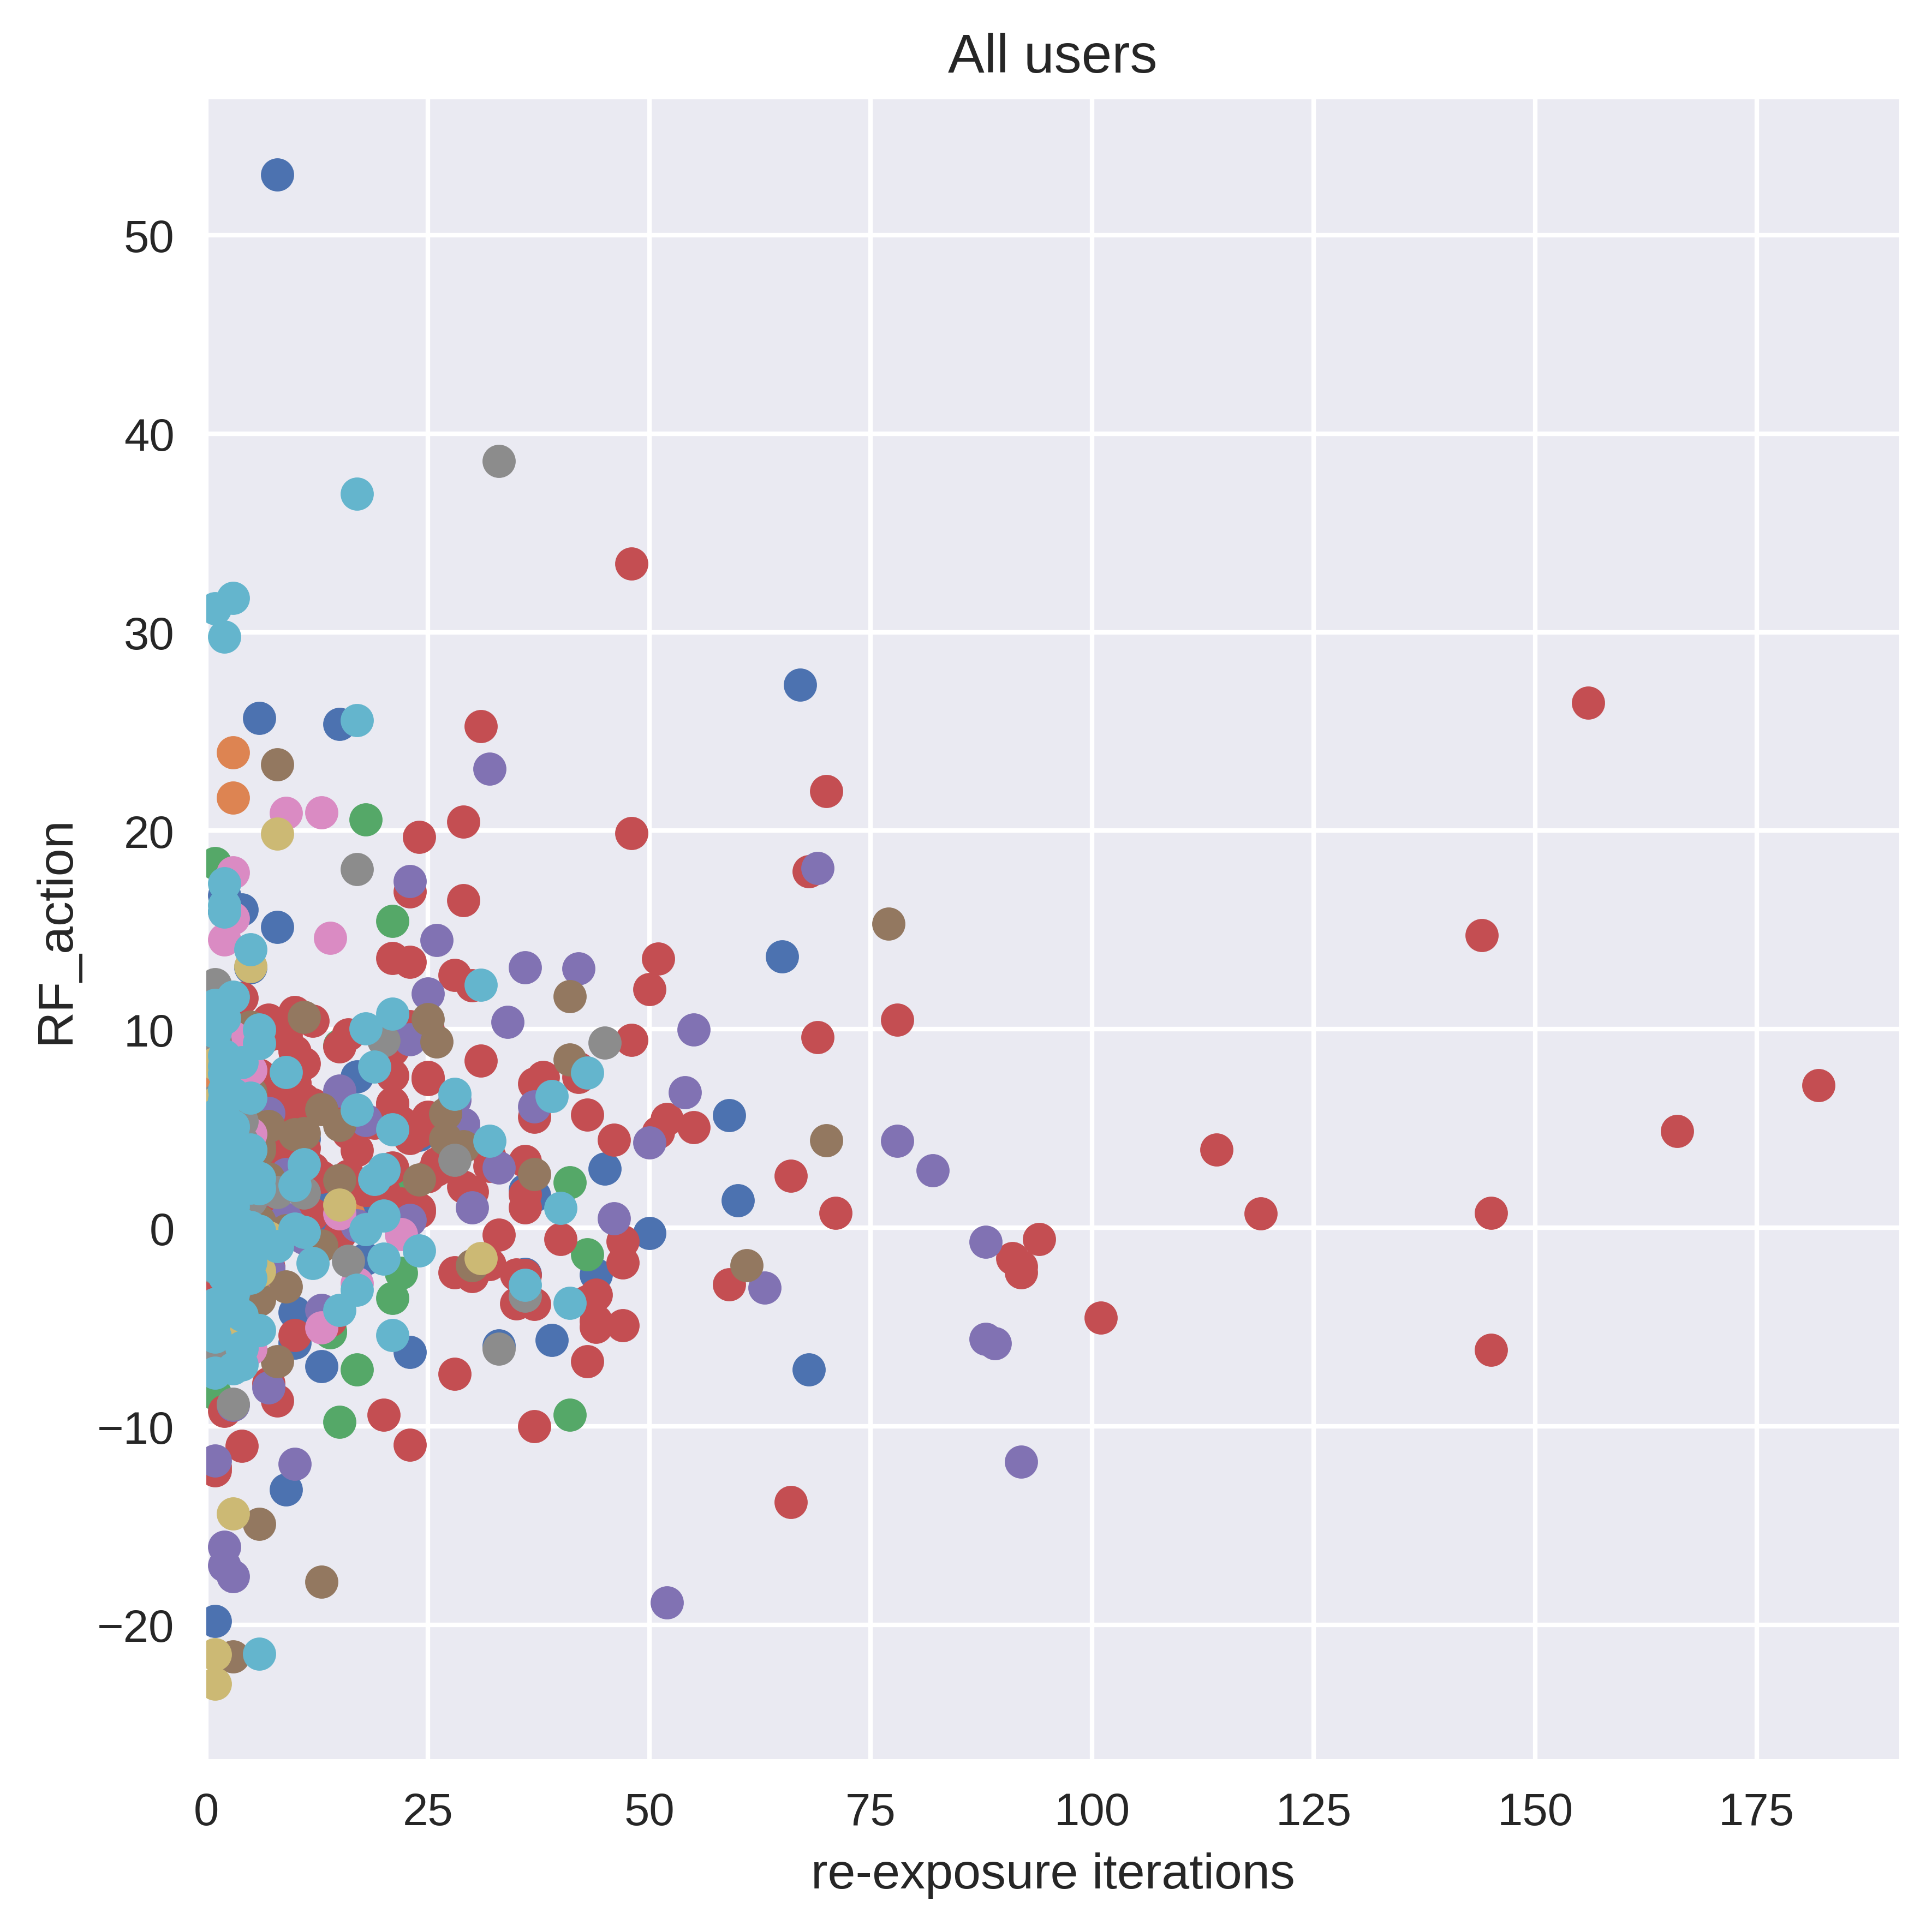

In [4]:
plt.style.use("seaborn")
SEABORN_COLORS = (
    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
    (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
    (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
    (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
    (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
    (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
    (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
    (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
    (0.8, 0.7254901960784313, 0.4549019607843137),
    (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
)

def plot_single_user_subplot(action_results_over_time: dict) :
    assert len(action_results_over_time["delta"]) > 0  # Don't log if state is not kept

    # Get deltas on x-axis
    deltas_x_per_action = defaultdict(list)
    for action, prev_res_over_time in action_results_over_time["prev_after_update_iter"].items():
        cur_res_over_time = action_results_over_time["current_before_update_iter"][action]
        for prev_t, new_t in zip(prev_res_over_time, cur_res_over_time):
            assert new_t >= prev_t, f"New iteration {new_t} <= prev iteration {prev_t}"
            deltas_x_per_action[action].append(new_t - prev_t)

    # Get values on y-axis
    deltas_y_per_action = action_results_over_time["delta"]


    for action, deltas_x in deltas_x_per_action.items():
        deltas_y = deltas_y_per_action[action]
        plt.scatter(deltas_x, deltas_y, color=plot_config['color'])



# 1 plot over all users
import pickle


fig = plt.figure(figsize=plot_config['figsize'],
                    dpi=plot_config['dpi'])  # So all bars are visible!

for idx, user_subdir in enumerate(os.scandir(parent_outputdir)):
    if not user_subdir.is_dir():
        continue
    user_dump_path = os.path.join(parent_outputdir, user_subdir.name, dump_filename)
    assert os.path.isfile(user_dump_path)

    dump = torch.load(user_dump_path)
    results = dump[CHOSEN_KEY]

    # Plot user
    color = SEABORN_COLORS[idx]
    plot_config['color'] = color
    plot_single_user_subplot(results)
    

plt.ylim(None, None)
plt.xlim(0, None)

plt.xlabel(plot_config['xlabel'])
plt.ylabel(plot_config['ylabel'])

if plot_config['title'] is not None:
    plt.title("All users")

fig.tight_layout()
   
plt.show()

$\rho = 0.19$
$\text{avg. RF} = 1.27 \pm 0.13$


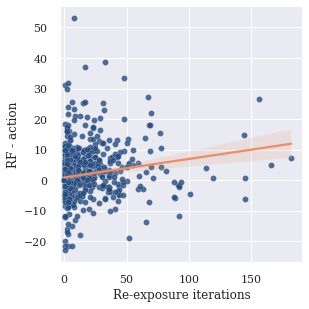

$\rho = 0.32$
$\text{avg. RF} = 1.58 \pm 0.09$


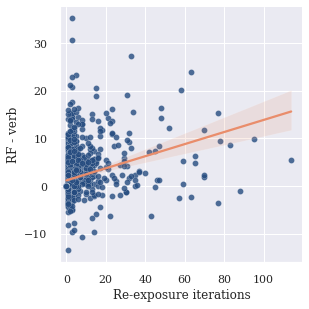

$\rho = 0.31$
$\text{avg. RF} = 1.55 \pm 0.12$


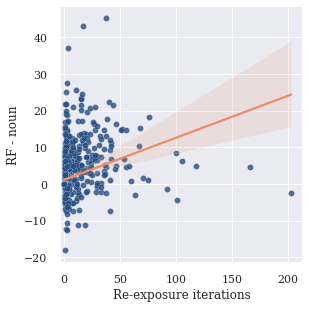

In [5]:
import datetime

# Apply the default theme
# sns.set(font_scale=1.1)
sns.set_context("paper")
sns.set_theme(rc={
    'font.family':'DeJavu Serif',
    'font.serif': 'Times New Roman',
    'font.size':30,
})



# Adapt cfg
ylabel_map = {
    'train_action_past/FORG_EXPOSE_loss': r"RF - action",
    'train_verb_past/FORG_EXPOSE_loss': r"RF - verb",
    'train_noun_past/FORG_EXPOSE_loss': r"RF - noun",
#     'train_action_past/FORG_EXPOSE_loss': r"$RF_{\text{action}}$",
}

title = "FORG_REEXPOSURE"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)

def add_to_df(action_results_over_time: dict, df_row_list, user_id) :
    assert len(action_results_over_time["delta"]) > 0  # Don't log if state is not kept

    # Get deltas on x-axis
    deltas_x_per_action = defaultdict(list)
    for action, prev_res_over_time in action_results_over_time["prev_after_update_iter"].items():
        cur_res_over_time = action_results_over_time["current_before_update_iter"][action]
        for prev_t, new_t in zip(prev_res_over_time, cur_res_over_time):
            assert new_t >= prev_t, f"New iteration {new_t} <= prev iteration {prev_t}"
            deltas_x_per_action[action].append(new_t - prev_t)

    # Get values on y-axis
    deltas_y_per_action = action_results_over_time["delta"]


    for action, deltas_x in deltas_x_per_action.items():
        deltas_y = deltas_y_per_action[action]
        
        for delta_x, delta_y in zip(deltas_x,deltas_y):
            df_row_list.append({'user':user_id,'iter_delta':delta_x,'forg':delta_y, 'action':action})
#         plt.scatter(deltas_x, deltas_y, color=plot_config['color'])



# 1 plot over all users

for y_label_key in ylabel_map.keys():
    plot_config['ylabel'] = ylabel_map[y_label_key]

    df_row_list:list[dict] = []
    for idx, user_subdir in enumerate(os.scandir(parent_outputdir)):
        if not user_subdir.is_dir():
            continue
        user_dump_path = os.path.join(parent_outputdir, user_subdir.name, dump_filename)
        assert os.path.isfile(user_dump_path)
        user_id = user_subdir.name.split('_')[-1]

        dump = torch.load(user_dump_path)
        results = dump[y_label_key]

        add_to_df(results, df_row_list, user_id)

    df = pd.DataFrame(df_row_list)

    # Get CORRELATIOn

    corr = scipy.stats.pearsonr(df.iter_delta, df.forg,)
#     print(f"CORR={corr}")
#     print(f"MEAN-DELTA={df.forg.mean()}, SE={df.forg.sem()}")

    print(fr"$\rho = {round(corr[0],2)}$")
    print(fr"$\text{{avg. RF}} = {round(df.forg.mean(),2)} \pm {round(df.forg.sem(),2)}$")
    # PLOTS
#     sns.relplot(
#         data=df,
#         x="iter_delta", y="forg", col="user", hue="user",
#     )

#     sns.relplot(
#         data=df,
#         x="iter_delta", y="forg", hue="user"
#     )

#     sns.lmplot(data=df, x="iter_delta", y="forg", col="user", hue="user")

    line_color = sns.color_palette("flare")[0]
    scat_color = sns.color_palette("crest")[5]
    ax =  sns.lmplot(data=df, x="iter_delta", y="forg", 
                     scatter_kws={"edgecolor":"w", "linewidth":0.2, "color": scat_color},
                     line_kws={"color": line_color})
    ax.set(xlabel='Re-exposure iterations', ylabel=plot_config['ylabel'])
    plt.ylim(None, None)
    plt.xlim(-3, None)
    
    
    fig = ax
    
    filename = plot_config['ylabel'].replace(' ','') + '.pdf'
    filepath = os.path.join(parent_dirpath,filename)
    os.makedirs(parent_dirpath, exist_ok=True)
    fig.savefig(filepath)
    
    plt.show()
    plt.close('all')


y_label_key=train_action_past/FORG_EXPOSE_loss
$\rho = 0.19$
$\text{avg. RF} = 1.27 \pm 0.13$
bin_means=[1.24919252 2.42149525 1.2377093  3.11452069 2.55566095 4.20785934
 5.05203791 3.05091737 3.90879446 6.56115396]
bin_sems=[0.46181248 0.58676957 0.60203203 0.80273748 0.92209229 0.96441592
 0.92968519 1.24417309 2.19980649 3.53802266]
bin_boundaries=[0.         0.22600714 0.45201428 0.67802142 0.90402856 1.13003569
 1.35604283 1.58204997 1.80805711 2.03406425 2.26007139]
bin_counts=[162. 105. 129. 104.  55.  70.  79.  46.  24.   8.]


<AxesSubplot:>

<ErrorbarContainer object of 3 artists>

[Text(0.5, 0, 're-exposure iterations'), Text(0, 0.5, 'RF - action')]

(0.0, 10.604135456771855)

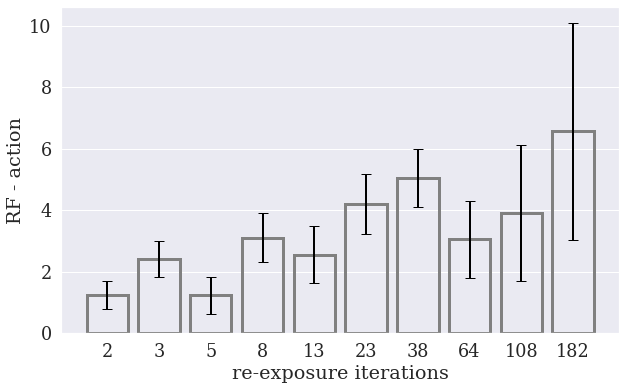

y_label_key=train_verb_past/FORG_EXPOSE_loss
$\rho = 0.32$
$\text{avg. RF} = 1.58 \pm 0.09$
bin_means=[2.49566334 4.13079881 4.70646165 4.63242043 3.58745029 4.22904886
 5.65255582 5.14421181 6.98833713 6.281859  ]
bin_sems=[0.22499037 0.36196758 0.56286086 0.61301599 0.5721019  0.67658496
 1.19800755 1.28928415 1.74101017 2.48871251]
bin_boundaries=[0.         0.20569049 0.41138097 0.61707146 0.82276194 1.02845243
 1.23414291 1.4398334  1.64552388 1.85121437 2.05690485]
bin_counts=[238. 127. 131.  62.  54.  66.  27.  28.  19.   7.]


<AxesSubplot:>

<ErrorbarContainer object of 3 artists>

[Text(0.5, 0, 're-exposure iterations'), Text(0, 0.5, 'RF - verb')]

(0.0, 9.209100081720667)

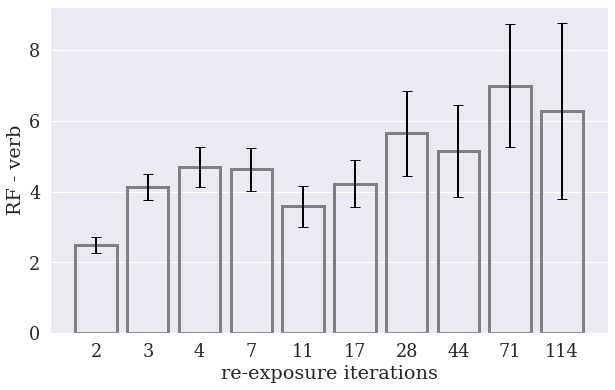

y_label_key=train_noun_past/FORG_EXPOSE_loss
$\rho = 0.31$
$\text{avg. RF} = 1.55 \pm 0.12$
bin_means=[2.65384951 3.30533068 3.4734792  4.51409992 4.37433369 8.96411992
 8.13622302 9.32823069 4.36929256 1.17504644]
bin_sems=[0.4001545  0.8256801  0.8128077  0.64747732 1.09151503 1.36983078
 1.39721694 1.55336501 2.48037402 3.54761791]
bin_boundaries=[0.         0.2307496  0.46149921 0.69224881 0.92299842 1.15374802
 1.38449762 1.61524723 1.84599683 2.07674643 2.30749604]
bin_counts=[144.  64.  83.  66.  38.  47.  42.  17.   8.   2.]


<AxesSubplot:>

<ErrorbarContainer object of 3 artists>

[Text(0.5, 0, 're-exposure iterations'), Text(0, 0.5, 'RF - noun')]

(0.0, 11.544304058909194)

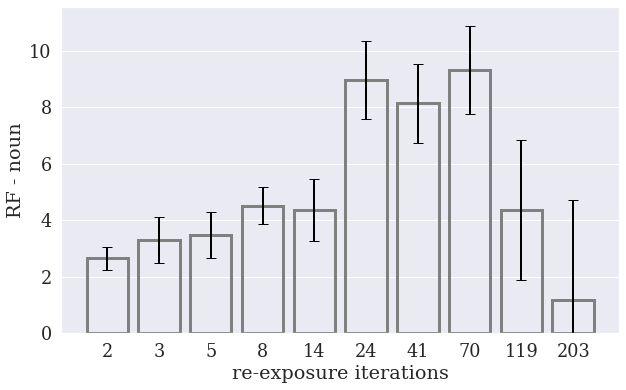

In [4]:
import datetime
import numpy as np

# Apply the default theme
# sns.set_context("paper")
# sns.set_theme(rc={
#     'font.family':'DeJavu Serif',
#     'font.serif': 'Times New Roman',
#     'font.size':30,
# })
sns.set(font_scale=1.6)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


# Adapt cfg
ylabel_map = {
    'train_action_past/FORG_EXPOSE_loss': r"RF - action",
    'train_verb_past/FORG_EXPOSE_loss': r"RF - verb",
    'train_noun_past/FORG_EXPOSE_loss': r"RF - noun",
#     'train_action_past/FORG_EXPOSE_loss': r"$RF_{\text{action}}$",
}

log_scale = True
nb_bins = 10

title = "FORG_REEXPOSURE"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)

def add_to_df(action_results_over_time: dict, df_row_list, user_id) :
    assert len(action_results_over_time["delta"]) > 0  # Don't log if state is not kept

    # Get deltas on x-axis
    deltas_x_per_action = defaultdict(list)
    for action, prev_res_over_time in action_results_over_time["prev_after_update_iter"].items():
        cur_res_over_time = action_results_over_time["current_before_update_iter"][action]
        for prev_t, new_t in zip(prev_res_over_time, cur_res_over_time):
            assert new_t >= prev_t, f"New iteration {new_t} <= prev iteration {prev_t}"
            deltas_x_per_action[action].append(new_t - prev_t)

    # Get values on y-axis
    deltas_y_per_action = action_results_over_time["delta"]


    for action, deltas_x in deltas_x_per_action.items():
        deltas_y = deltas_y_per_action[action]
        
        for delta_x, delta_y in zip(deltas_x,deltas_y):
            df_row_list.append({'user':user_id,'iter_delta':delta_x,'forg':delta_y, 'action':action})
#         plt.scatter(deltas_x, deltas_y, color=plot_config['color'])

# 1 plot over all users

for y_label_key in ylabel_map.keys():
    print(f"y_label_key={y_label_key}")
    plot_config['ylabel'] = ylabel_map[y_label_key]

    df_row_list:list[dict] = []
    for idx, user_subdir in enumerate(os.scandir(parent_outputdir)):
        if not user_subdir.is_dir():
            continue
        user_dump_path = os.path.join(parent_outputdir, user_subdir.name, dump_filename)
        assert os.path.isfile(user_dump_path)
        user_id = user_subdir.name.split('_')[-1]

        dump = torch.load(user_dump_path)
        results = dump[y_label_key]

        add_to_df(results, df_row_list, user_id)

    df = pd.DataFrame(df_row_list)

    # Get CORRELATIOn

    corr = scipy.stats.pearsonr(df.iter_delta, df.forg,)
#     print(f"CORR={corr}")
#     print(f"MEAN-DELTA={df.forg.mean()}, SE={df.forg.sem()}")

    print(fr"$\rho = {round(corr[0],2)}$")
    print(fr"$\text{{avg. RF}} = {round(df.forg.mean(),2)} \pm {round(df.forg.sem(),2)}$")
    # PLOTS
    
    # Filter without 0-iter entries
    df = df.loc[df.iter_delta > 0]
    
        # To log-scale
    if log_scale:
        df.iter_delta = np.log10(df.iter_delta)
        #df.forg = np.log10(df.forg) # Negative and 0 -> inf
    
    vals_to_bin = df.iter_delta
    stat_values = df.forg
    bin_means, bin_boundaries, _ = scipy.stats.binned_statistic(vals_to_bin, stat_values, statistic='mean', bins=nb_bins, range=None)
    bin_sems, *_ = scipy.stats.binned_statistic(vals_to_bin, stat_values, statistic=scipy.stats.sem, bins=nb_bins, range=None)
    bin_counts, *_ = scipy.stats.binned_statistic(vals_to_bin, stat_values, statistic='count', bins=nb_bins, range=None)

    print(f"bin_means={bin_means}")
    print(f"bin_sems={bin_sems}")
    print(f"bin_boundaries={bin_boundaries}")
    print(f"bin_counts={bin_counts}")

    fig, ax = plt.subplots(figsize=(10, 6))

#     x_bin_vals = [round(x,1) for x in bin_boundaries[1:]] # Still log iterations? Not making a lot of sense
    x_bin_vals = [round(10**x) for x in bin_boundaries[1:]] # De-logscale
    
    sns.barplot(x=x_bin_vals, y=bin_means,  ax=ax,
#                 yerr=bin_sems, markeredgewidth=10
                linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
               )

#     line_color = sns.color_palette("flare")[0]
#     scat_color = sns.color_palette("crest")[5]
#     ax =  sns.lmplot(data=df, x="iter_delta", y="forg", 
#                      scatter_kws={"edgecolor":"w", "linewidth":0.2, "color": scat_color},
#                      line_kws={"color": line_color})
    
#     ax.set(xscale="log", yscale="log")

    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x_coords, y_coords, yerr=bin_sems,fmt='none',c='black', capsize=5, elinewidth=2, markeredgewidth=1)
    
#     ax.bar(x=x_bin_vals, height=bin_means, yerr=bin_sems, capsize=50)

#     ax.set(xlabel='log(re-exposure iterations)', ylabel=plot_config['ylabel'])
    ax.set(xlabel='re-exposure iterations', ylabel=plot_config['ylabel'])
    plt.ylim(0, None)
#     plt.xlim(-3, None)
    

    
#     fig = ax
    
    filename = plot_config['ylabel'].replace(' ','') + '.pdf'
    filepath = os.path.join(parent_dirpath,filename)
    os.makedirs(parent_dirpath, exist_ok=True)
    fig.savefig(filepath)
    
    plt.show()
    plt.close('all')
